#  <font size="+5"><center>The Happiest Notebook Ever! </center></font>  

# Let's explore around the world with Daniel and Francis, which country is the happiest?

# Let's GOOOOOOOOO

<img src="Hogan.jpg" height="350" width="350" style="float:left">
<img src="disney-pixar-inside-out-joy-life-size-cardboard-cutout.jpg"/ height="500" width="500">

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# About Our Data
This is our data set from Kaggle about what factors are taken when deciding the ladder score, the happiness score, of each country. Our analysis will include factors like freedom, generosity, and distribution of happiness among each country. Our goal of this project is to understand the different factors that affect each countries happiness and finding different trends that correlate within such regions of the world. Using different charts, graphs, scatter plots, and interactive heat maps, we were able to find interesting results.  


<img src="Quote.jpg" height="350" width="350" style="float:left">


In [3]:
happy = pd.read_csv("2020.csv")
happy.head(100000) 

Country name  Regional indicator  Ladder score  \
0                     Finland      Western Europe        7.8087   
1                     Denmark      Western Europe        7.6456   
2                 Switzerland      Western Europe        7.5599   
3                     Iceland      Western Europe        7.5045   
4                      Norway      Western Europe        7.4880   
..                        ...                 ...           ...   
148  Central African Republic  Sub-Saharan Africa        3.4759   
149                    Rwanda  Sub-Saharan Africa        3.3123   
150                  Zimbabwe  Sub-Saharan Africa        3.2992   
151               South Sudan  Sub-Saharan Africa        2.8166   
152               Afghanistan          South Asia        2.5669   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                          0.031156      7.869766      7.747634   
1                          0.033492      7.711245      7.579955   
2                          0.035014      7.628528      7.491272   
3                          0.059616      7.621347      7.387653   
4                          0.034837      7.556281      7.419719   
..                              ...           ...           ...   
148                        0.115183      3.701658      3.250141   
149                        0.052425      3.415053      3.209547   
150                        0.058674      3.414202      3.184198   
151                        0.107610      3.027516      2.605684   
152                        0.031311      2.628270      2.505530   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                10.639267        0.954330                71.900825   
1                10.774001        0.955991                72.402504   
2                10.979933        0.942847                74.102448   
3                10.772559        0.974670                73.000000   
4                11.087804        0.952487                73.200783   
..                     ...             ...                      ...   
148               6.625160        0.319460                45.200001   
149               7.600104        0.540835                61.098846   
150               7.865712        0.763093                55.617260   
151               7.425360        0.553707                51.000000   
152               7.462861        0.470367                52.590000   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                        0.949172   -0.059482                   0.195445   
1                        0.951444    0.066202                   0.168489   
2                        0.921337    0.105911                   0.303728   
3                        0.948892    0.246944                   0.711710   
4                        0.955750    0.134533                   0.263218   
..                            ...         ...                        ...   
148                      0.640881    0.082410                   0.891807   
149                      0.900589    0.055484                   0.183541   
150                      0.711458   -0.072064                   0.810237   
151                      0.451314    0.016519                   0.763417   
152                      0.396573   -0.096429                   0.933687   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                    1.972317                          1.285190   
1                    1.972317                          1.326949   
2                    1.972317                          1.390774   
3                    1.972317                          1.326502   
4                    1.972317                          1.424207   
..                        ...                               ...   
148                  1.972317                          0.041072   
149                  1.972317                          0.343243   
150                  1.972317         

# The Cleaning Process
When extracting data from different sources like Kaggle, data scientists must clean the data to make it more convenient when analyzing. To sort our data, we wanted to simplify our findings by combining such regions into different continents. Our first step was sorting out the different regional indicators using value counts. 

In [4]:
happy['Regional indicator'].value_counts()

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [5]:
happy.columns = ['Country name', 'Region', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual']

In [6]:
Asia = ['Southeast Asia', 'South Asia', 'East Asia']
Africa = ['Sub-Saharan Africa', 'Middle East and North Africa']
Europe = ['Western Europe', 'Central and Eastern Europe', 'Commonwealth of Independent States']
North_America = ['North America and ANZ']
South_America = ['Latin America and Caribbean']

Our second stop grouping the different regions into their respective continents. Our goal was to make it simpler and easier to understand by continents rather than the different specific regions. For instance, when defining Asia, we combined different strings like Southeast Asia, South Asia, East Asia. 

In [7]:
def Continent(region):

    if region in Asia:
        return 'Asia'
    if region in Africa:
        return 'Africa'
    if region in Europe:
        return 'Europe'
    if region in North_America:
        return 'North America'
    if region in South_America:
        return 'South America'
    
happy['Region'] = happy['Region'].apply(Continent)

If the region lies in Asia then we want Asia to display in each column of the region. This step was crucial for sorting each region. 

In [8]:
happy.columns = ['Country name', 'Continent', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual']

In [9]:
happy.head()

Country name Continent  Ladder score  Standard error of ladder score  \
0      Finland    Europe        7.8087                        0.031156   
1      Denmark    Europe        7.6456                        0.033492   
2  Switzerland    Europe        7.5599                        0.035014   
3      Iceland    Europe        7.5045                        0.059616   
4       Norway    Europe        7.4880                        0.034837   

   upperwhisker  lowerwhisker  Logged GDP per capita  Social support  \
0      7.869766      7.747634              10.639267        0.954330   
1      7.711245      7.579955              10.774001        0.955991   
2      7.628528      7.491272              10.979933        0.942847   
3      7.621347      7.387653              10.772559        0.974670   
4      7.556281      7.419719              11.087804        0.952487   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                71.900825                      0.949172   -0.059482   
1                72.402504                      0.951444    0.066202   
2                74.102448                      0.921337    0.105911   
3                73.000000                      0.948892    0.246944   
4                73.200783                      0.955750    0.134533   

   Perceptions of corruption  Ladder score in Dystopia  \
0                   0.195445                  1.972317   
1                   0.168489                  1.972317   
2                   0.303728                  1.972317   
3                   0.711710                  1.972317   
4                   0.263218                  1.972317   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                          1.285190                      1.499526   
1                          1.326949                      1.503449   
2                          1.390774                      1.472403   
3                          1.326502                      1.547567   
4                          1.424207                      1.495173   

   Explained by: Healthy life expectancy  \
0                               0.961271   
1                               0.979333   
2                               1.040533   
3                               1.000843   
4                               1.008072   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.662317                  0.159670   
1                                    0.665040                  0.242793   
2                                    0.628954                  0.269056   
3                                    0.661981                  0.362330   
4                                    0.670201                  0.287985   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                 0.477857             2.762835  
1                                 0.495260             2.432741  
2                                 0.407946             2.350267  
3                                 0.144541             2.460688  
4                                 0.434101             2.168266

After making the changes, we want to see if the colmns were displaying the happiness data properly.

In addition, we sorted out the regions by continent and found that North America is the highest average ladder score among all continents.  Africa has the lowest ladder score. The GDP, freedom, health life expectancy correlates towards the contribution to the average ladder score of each continent. For instance, North America has the highest GDP, freedom score, life expectancy, and such factors which led to its outstanding performance of ladder score. 

In [10]:
group = happy.groupby('Continent').mean().reset_index()
group

/var/folders/0m/k4f8hdf93rj0tkm9c4cfh38r0000gn/T/ipykernel_29226/2664008015.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = happy.groupby('Continent').mean().reset_index()


Continent  Ladder score  Standard error of ladder score  upperwhisker  \
0         Africa      4.639607                        0.064979      4.766966   
1           Asia      5.184886                        0.043827      5.270788   
2         Europe      6.184172                        0.041823      6.266144   
3  North America      7.173525                        0.042257      7.256349   
4  South America      5.981786                        0.063247      6.105750   

   lowerwhisker  Logged GDP per capita  Social support  \
0      4.512248               8.453396        0.716806   
1      5.098985               9.369065        0.797224   
2      6.102200              10.090604        0.886484   
3      7.090701              10.709919        0.933842   
4      5.857821               9.303024        0.856891   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                58.194704                      0.716808   -0.023970   
1                65.732000                      0.826491    0.063214   
2                69.307727                      0.809150   -0.028483   
3                72.177067                      0.907045    0.164180   
4                66.717328                      0.830684   -0.071901   

   Perceptions of corruption  Ladder score in Dystopia  \
0                   0.767704                  1.972317   
1                   0.731476                  1.972317   
2                   0.690491                  1.972317   
3                   0.431717                  1.972317   
4                   0.801526                  1.972317   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                          0.607709                      0.938509   
1                          0.891508                      1.128451   
2                          1.115139                      1.339278   
3                          1.307087                      1.451136   
4                          0.871039                      1.269381   

   Explained by: Healthy life expectancy  \
0                               0.467830   
1                               0.739184   
2                               0.867916   
3                               0.971216   
4                               0.774657   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.383817                  0.183157   
1                                    0.515277                  0.240817   
2                                    0.494494                  0.180172   
3                                    0.611826                  0.307593   
4                                    0.520302                  0.151457   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                 0.108389             1.950200  
1                                 0.131779             1.537868  
2                                 0.158240             2.028935  
3                                 0.325313             2.199327  
4                                 0.086553             2.308386

# What is a Ladder Score?

A ladder score is a happiness index for each country. The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

<img src="Joy.jpeg" height="350" width="350">



In [11]:
!pip install plotly

In [12]:
import plotly.express as px

# Hapinnesss Data Visualizations  
After understanding this correlation, we wanted to add data visualization to this project. To create such data visualization we must install plotly which is a graphing library that facilitates such magic. We used several visualizations including bar plots, interactive heat maps, distribution plots, and scatter plots to compare and contrast each different continent's ladder score. Please note that the data in North America include the regions of the United States, Canada, Australia, and New Zealand.

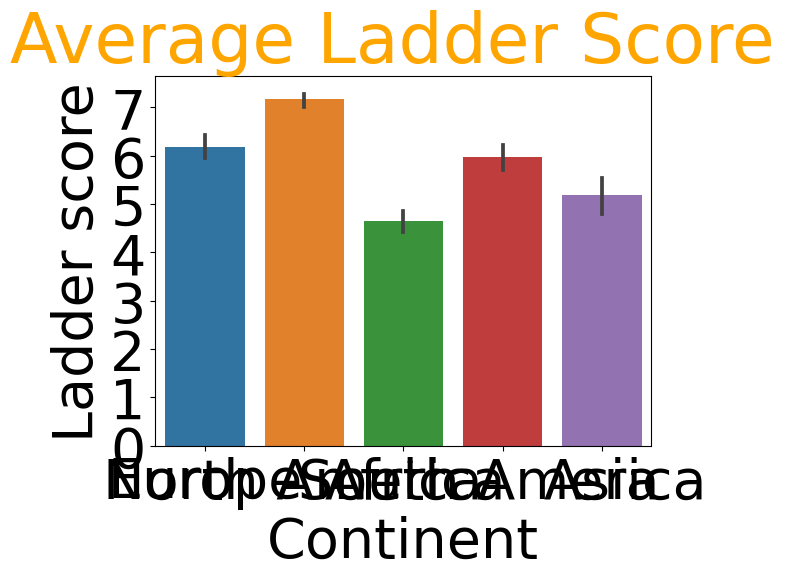

In [13]:
sns.barplot(x = 'Continent', y = 'Ladder score', data = happy)
plt.title('Average Ladder Score ', size=50, color='Orange');
plt.xticks(size=40, color='black');
plt.yticks(size=40, color='black');
plt.xlabel('Continent', size=40, color='black');
plt.ylabel('Ladder score', size=40, color='black');

Using a bar graph, we can see the average ladder score of each continent. We understand that the range of happiness of each continent lies between 7.26 to 4.77. Using the graph we can see that the average ladder score is close to 5. We can also rank country understanding that the top 3 countries are North America, Europe, and South America respectively. 

In [14]:
(7.17+5.98+6.18+5.18+4.63)/5

5.827999999999999

Using the equation above we found the average ladder score of 5.82799 among all contients which is close to our approximation. The following bar graphs will be broken down by each country in each continent. 

# NEVER STOP EXPLORING
# LETS ADVENTURE AROUND THE WORLD


<img src="Daniel.jpeg" height="350" width="350" style="float:left">
<img src="IMG_7052.png"/ height="500" width="500">


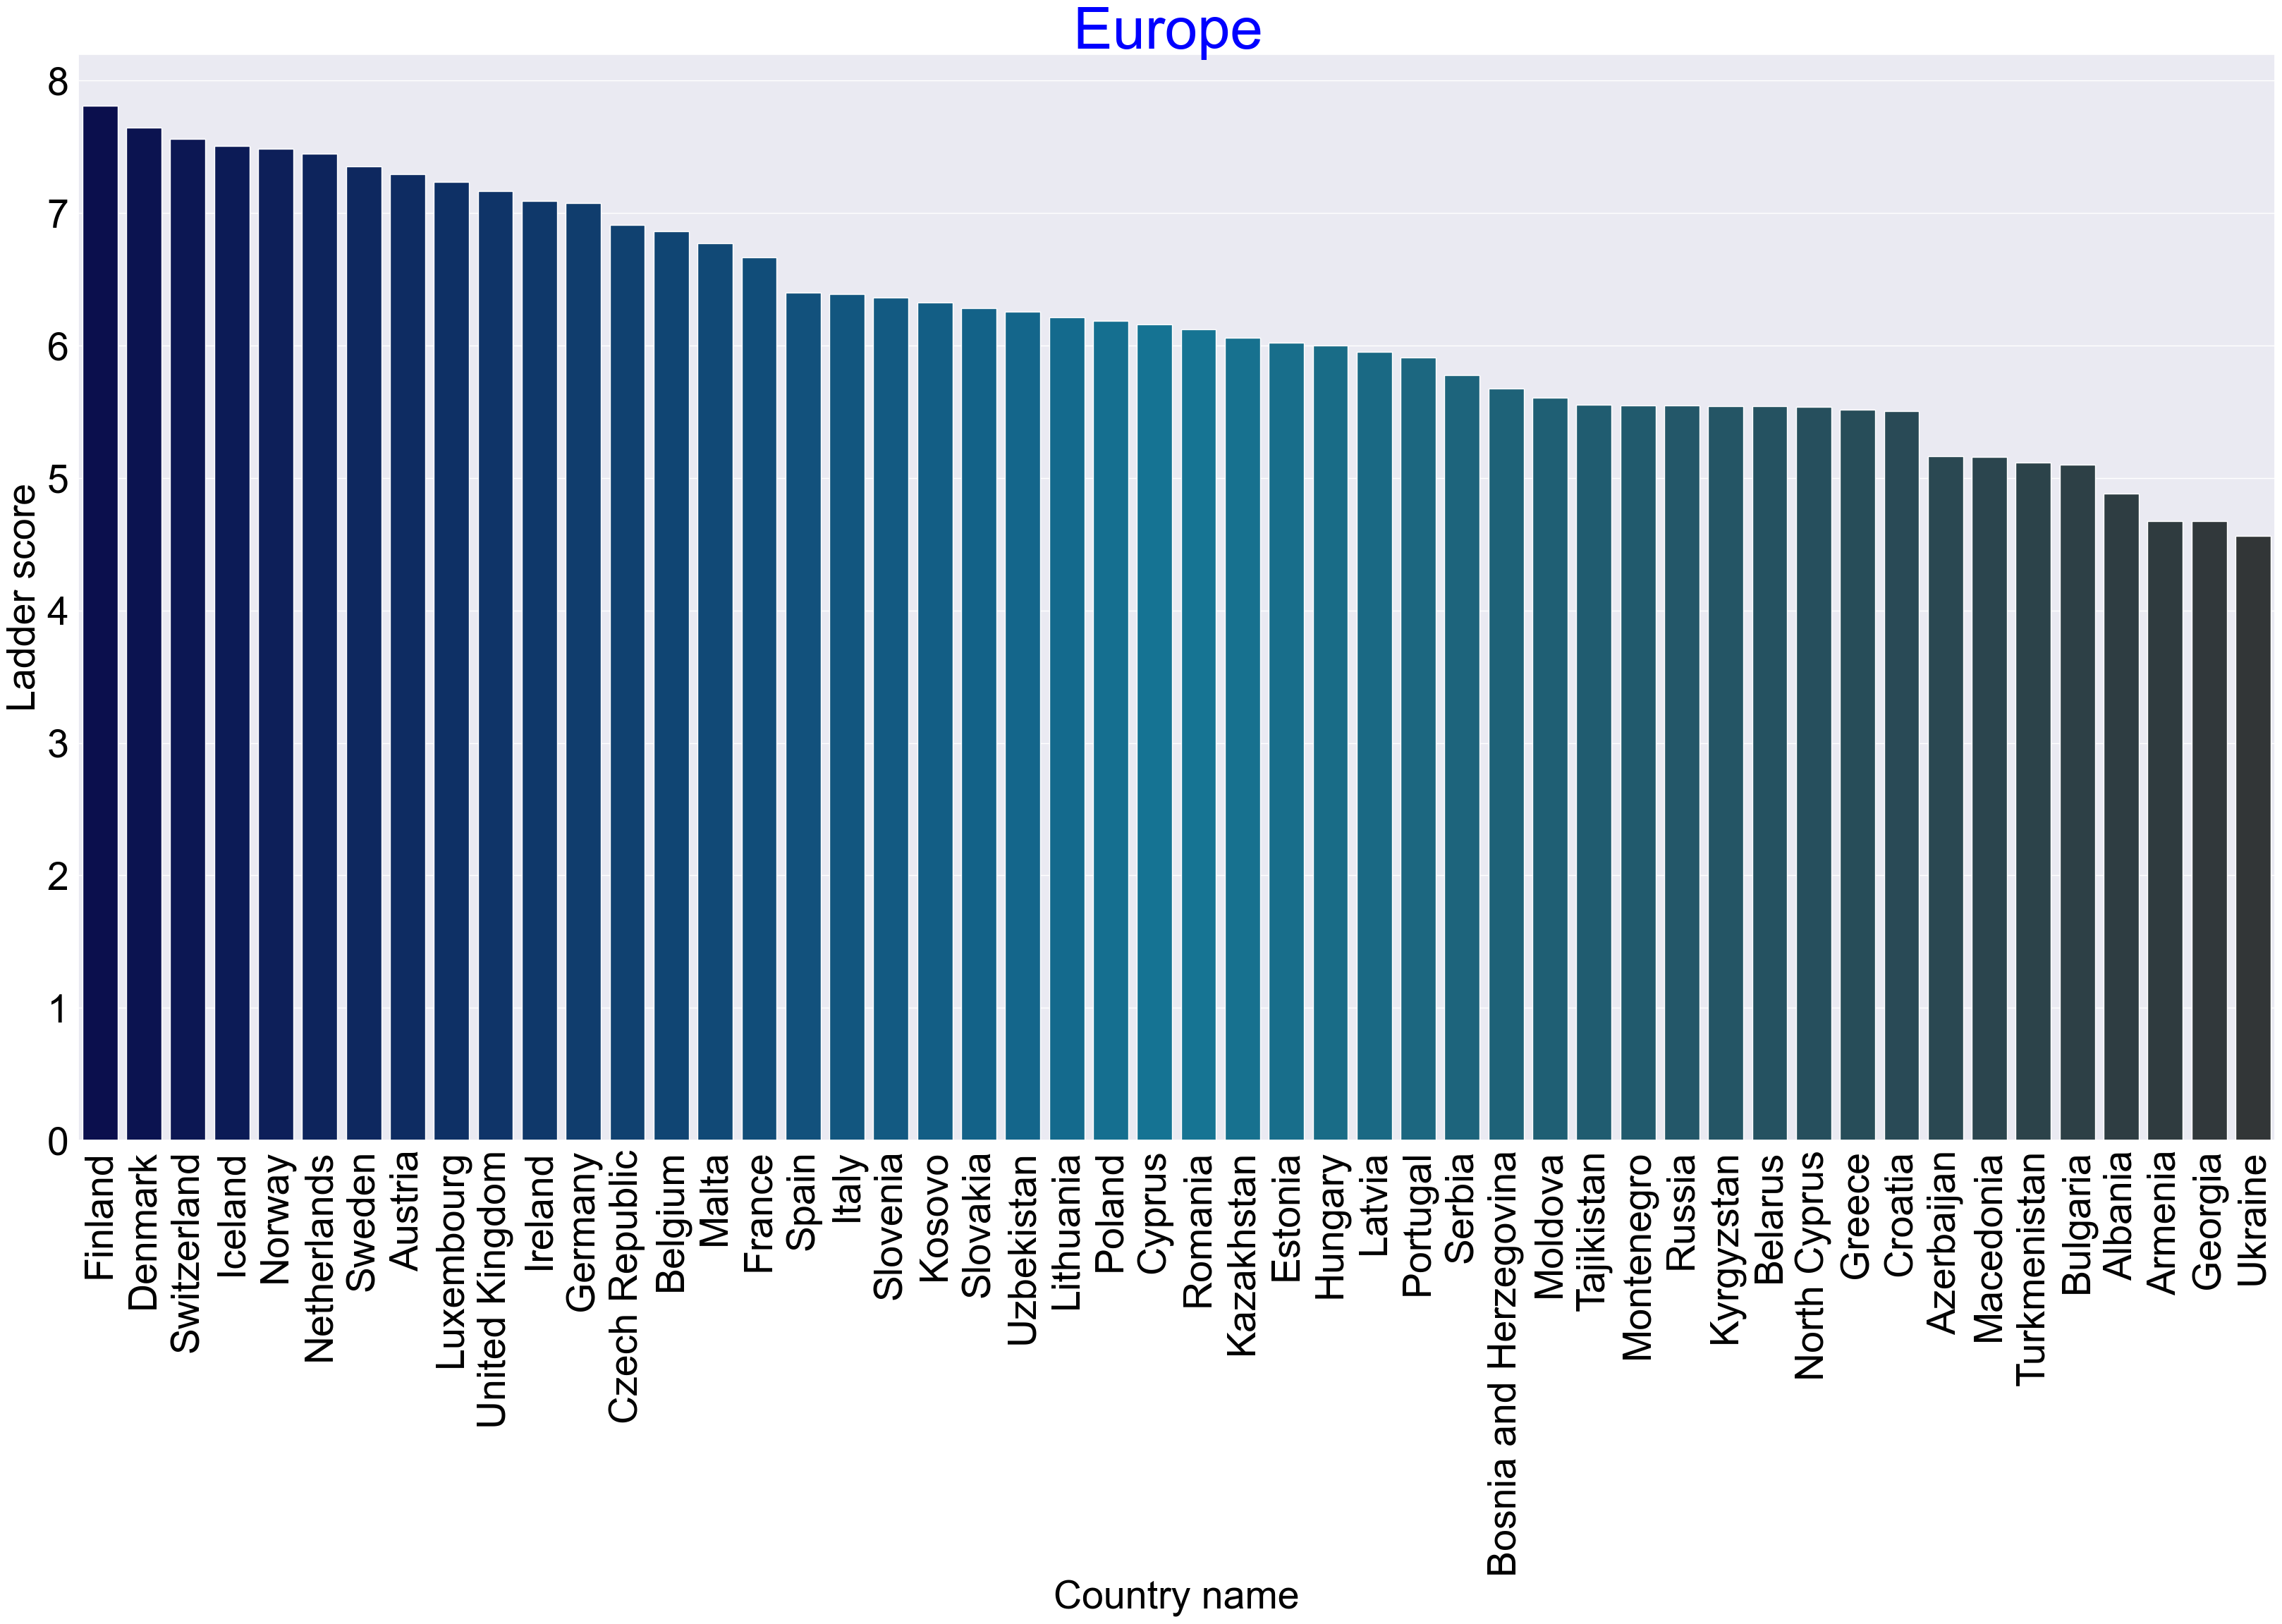

In [15]:
sns.set(rc={'figure.figsize':(40.2, 20)})
European_Countries = happy[happy['Continent'] == 'Europe']
sns.barplot(x = 'Country name', y = 'Ladder score',palette="ocean_d", data = European_Countries)
plt.xticks(rotation=90)
plt.xticks(size=40, color='black');
plt.yticks(size=40, color='black');
plt.xlabel('Country name', size=40, color='black');
plt.ylabel('Ladder score', size=40, color='black');
plt.title('Europe ', size=60, color='Blue');

<img src="Finnland.jpg" height="350" width="350">


We start our adventure by traveling to Europe where the happiest country is Finland. We spent the night stargazing and seeing the beautiful northern lights. We took a road trip down to Ukraine as they face huge pressure from Russia. We can see the struggle within the citizens in Ukraine. Europe has a consistent average of 6.18. 


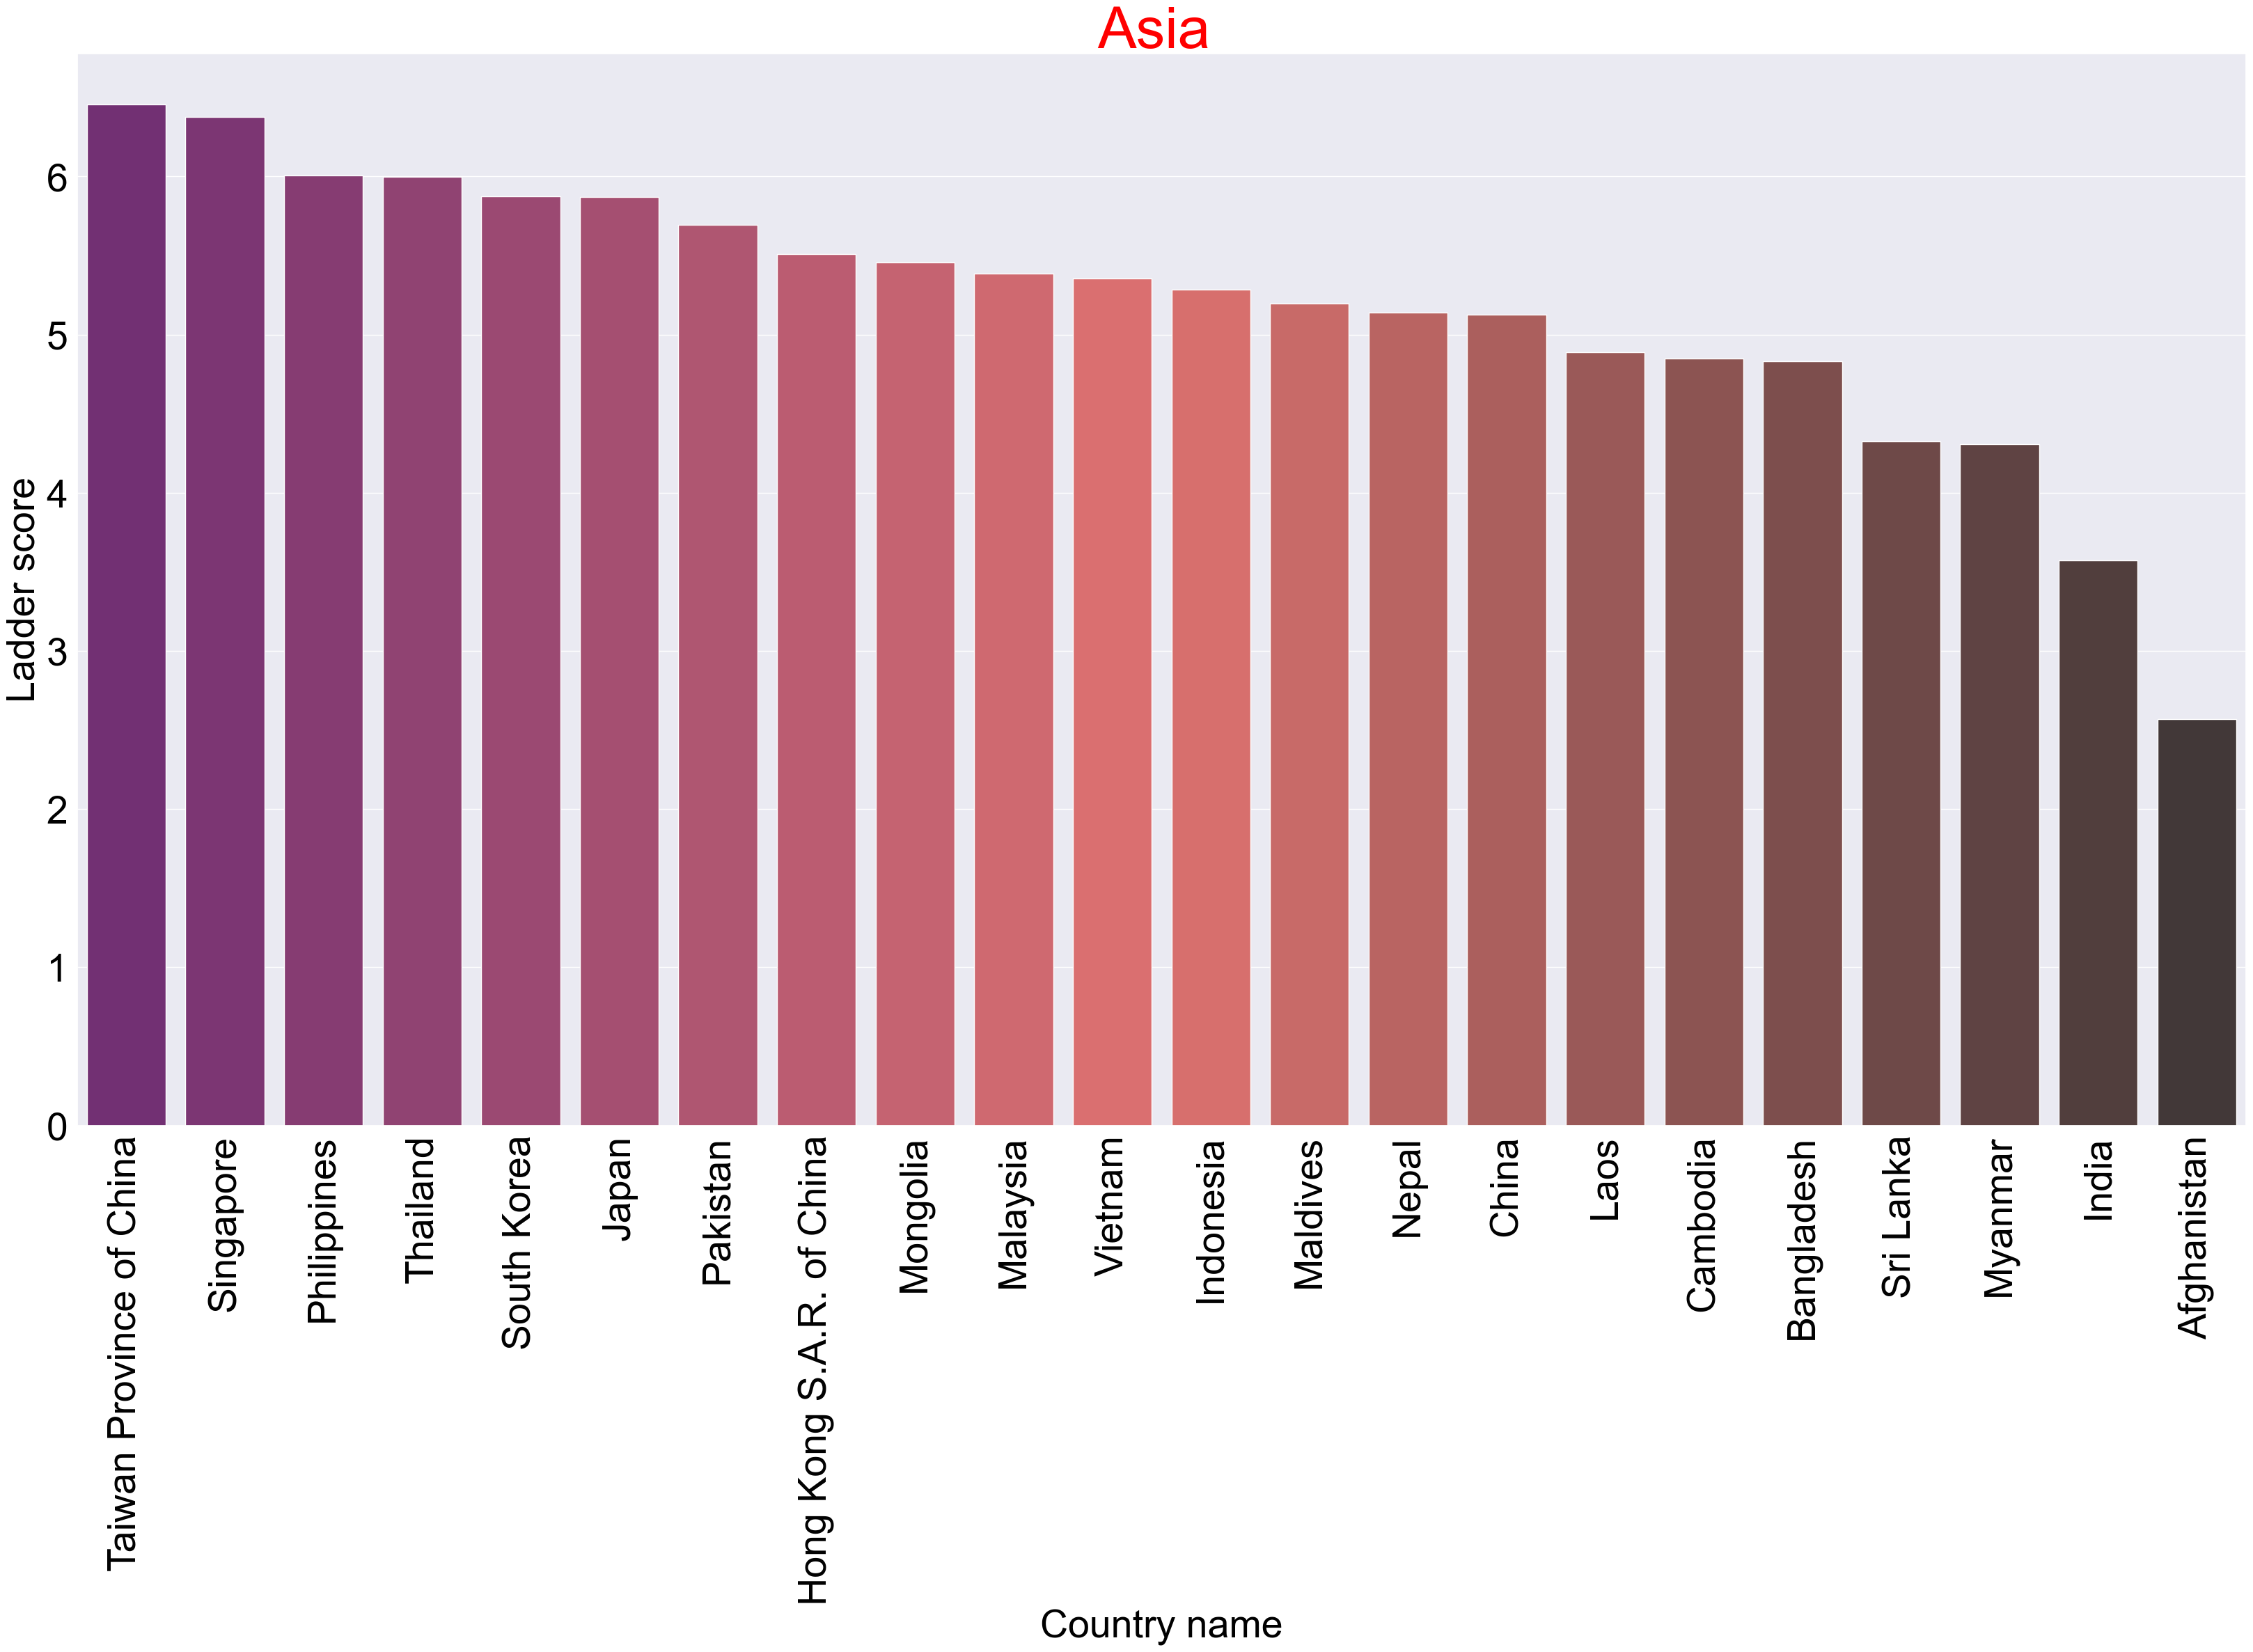

In [16]:
Asian_Countries = happy[happy['Continent'] == 'Asia']
sns.barplot(x = 'Country name', y = 'Ladder score', palette="magma_d", data = Asian_Countries)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(40.2, 20)})
plt.xticks(size=40, color='black');
plt.yticks(size=40, color='black');
plt.xlabel('Country name', size=40, color='black');
plt.ylabel('Ladder score', size=40, color='black');
plt.title('Asia ', size=60, color='Red');

<img src="fireworks.jpg" height="350" width="350">


We then travel to Asia to a country called Taiwan, where we eat some amazing night market food and explore Taipei 101. We also travel to the mainland and visit Afghanistan where the country still struggles from the Afghanistan War. Asia has a consistent average of 5.18 and is ranked 4 among the continents. 

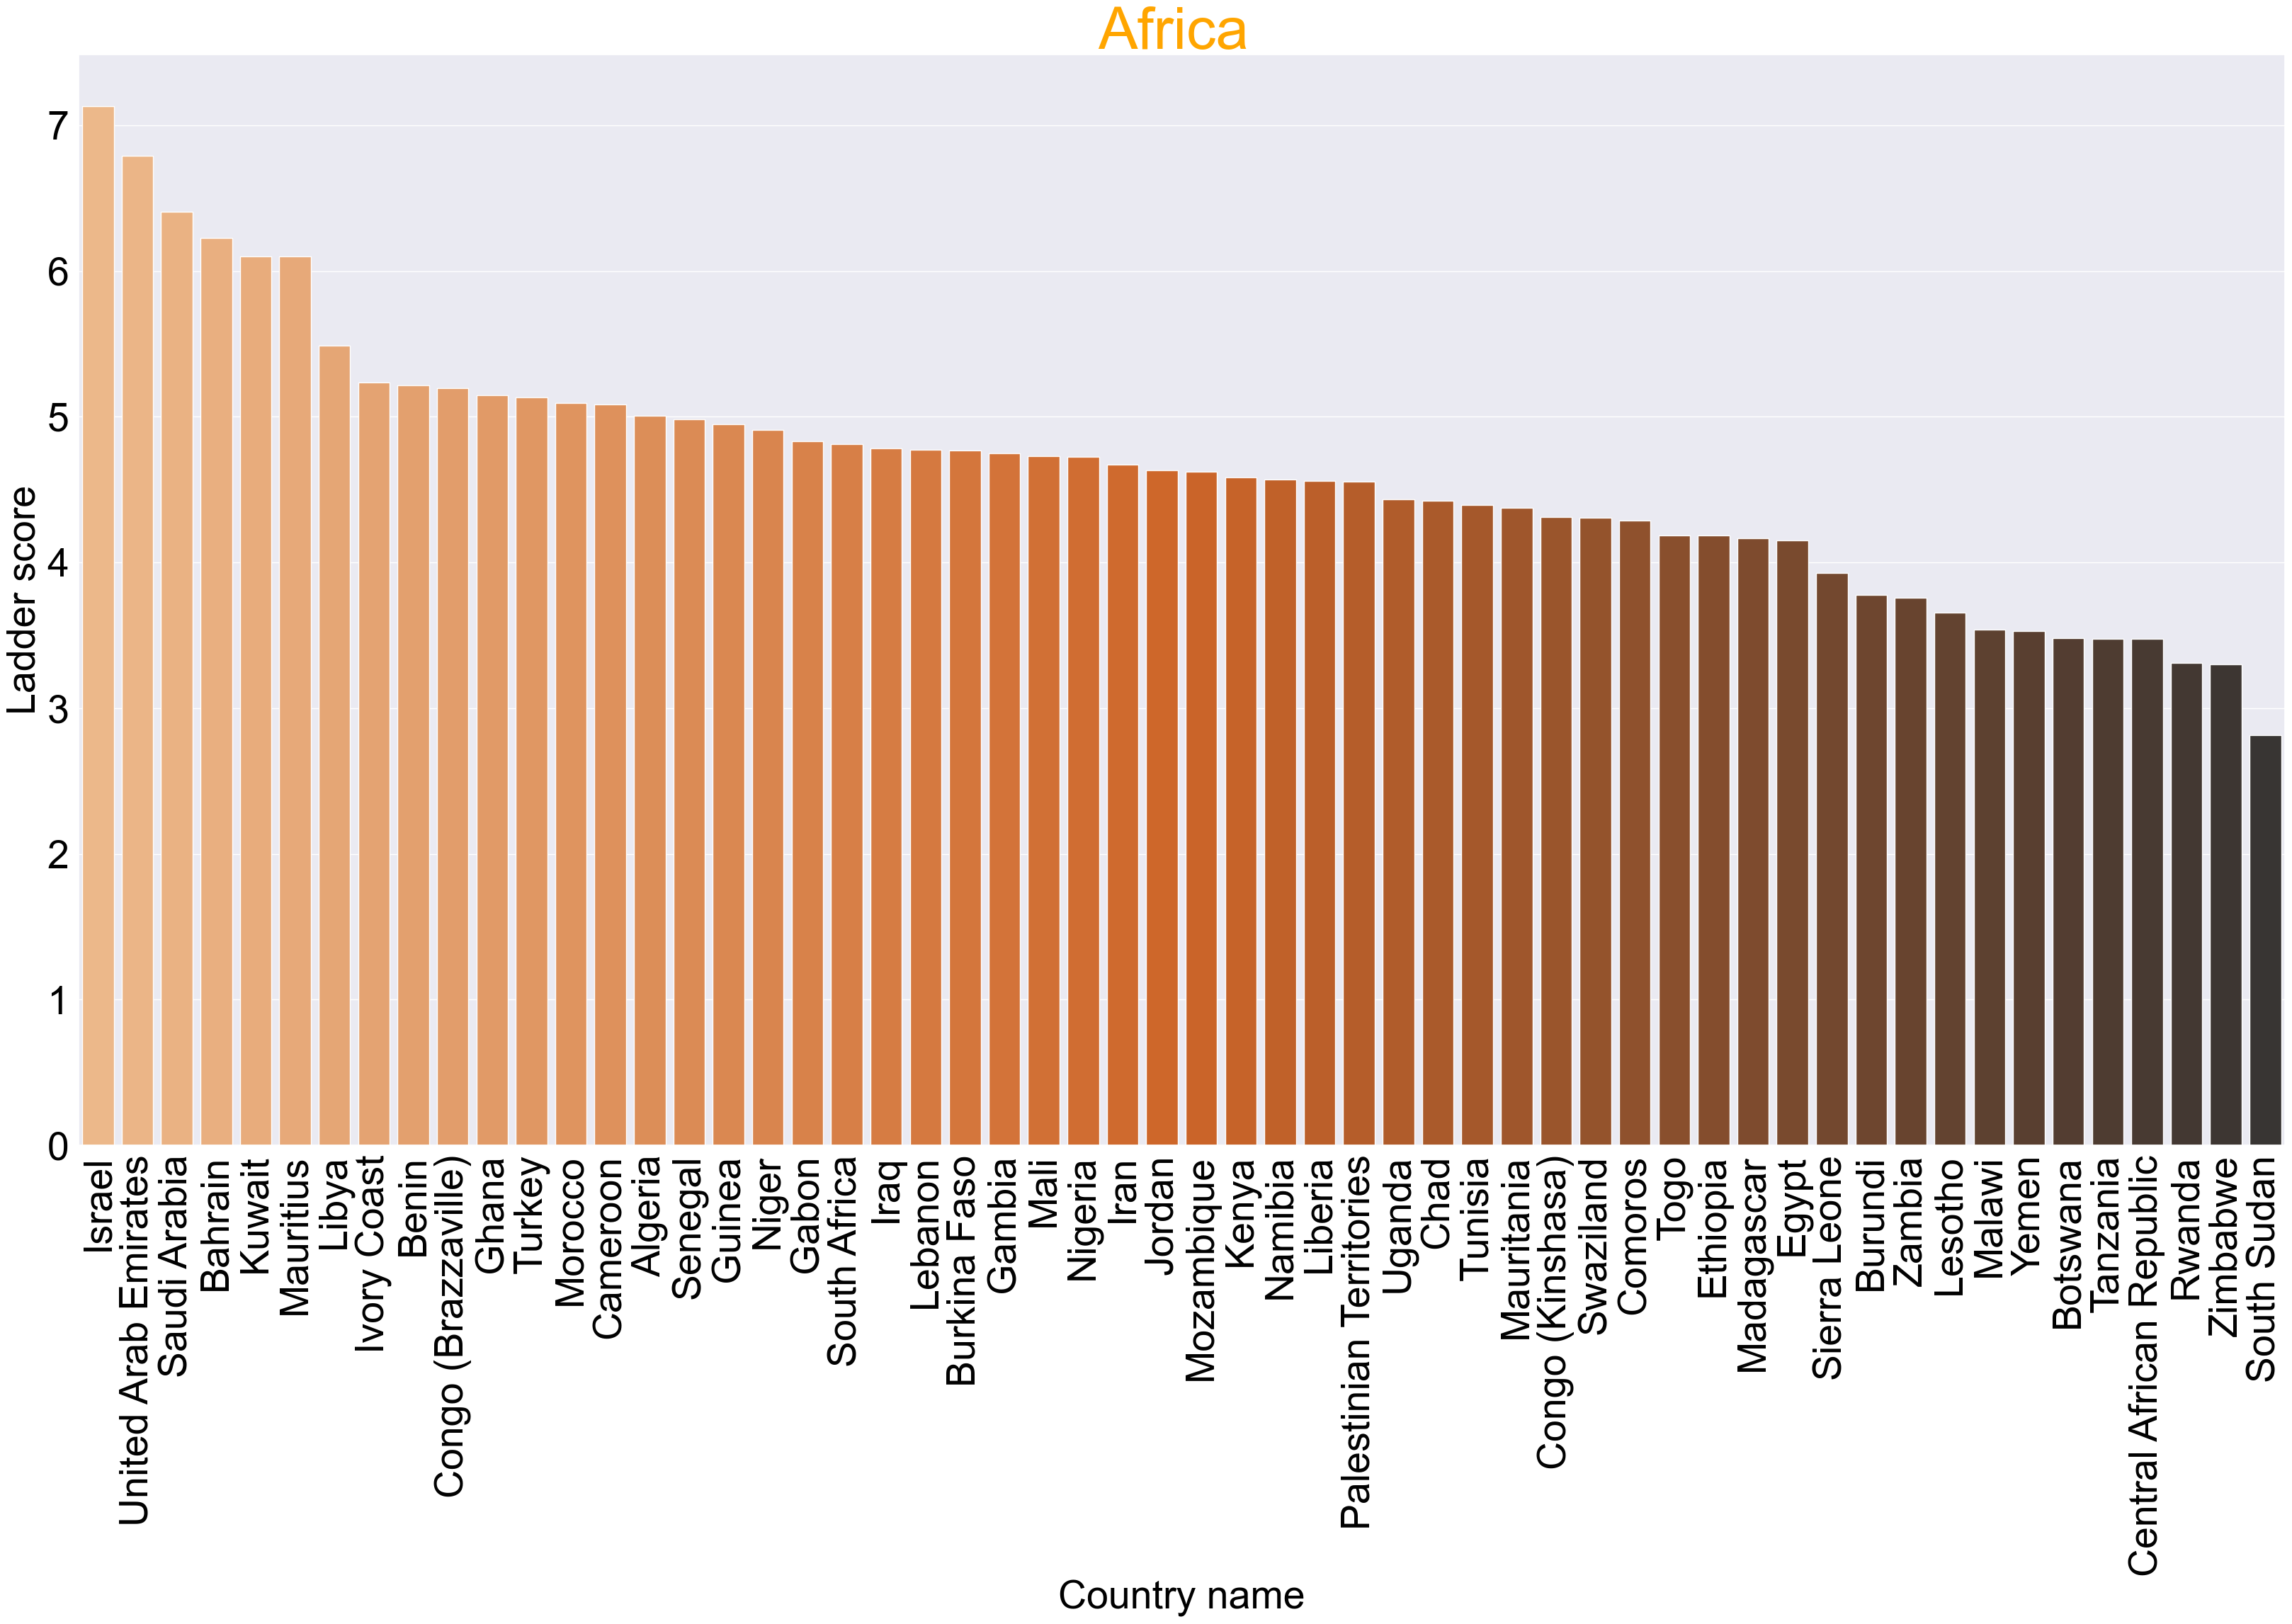

In [17]:
Africa_Countries = happy[happy['Continent'] == 'Africa']
sns.barplot(x = 'Country name', y = 'Ladder score',palette="Oranges_d", data = Africa_Countries )
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(40.2, 20)})
plt.xticks(size=40, color='black');
plt.yticks(size=40, color='black');
plt.xlabel('Country name', size=40, color='black');
plt.ylabel('Ladder score', size=40, color='black');
plt.title('Africa ', size=60, color='Orange');

<img src="Isreal.jpg" height="350" width="350">


Let's sail down to Africa where the happiest country is Isreal were there celebrating Shabbat which is a time of reflection of the week. We also went to South Sudan where the Civil War has just ended and the country is still seeing a dramatic scar from this tragedy making it the least happy. Africa has a consistent average of 4.63 and is ranked 5 among the continents. WAKANDA FOREVER!!!

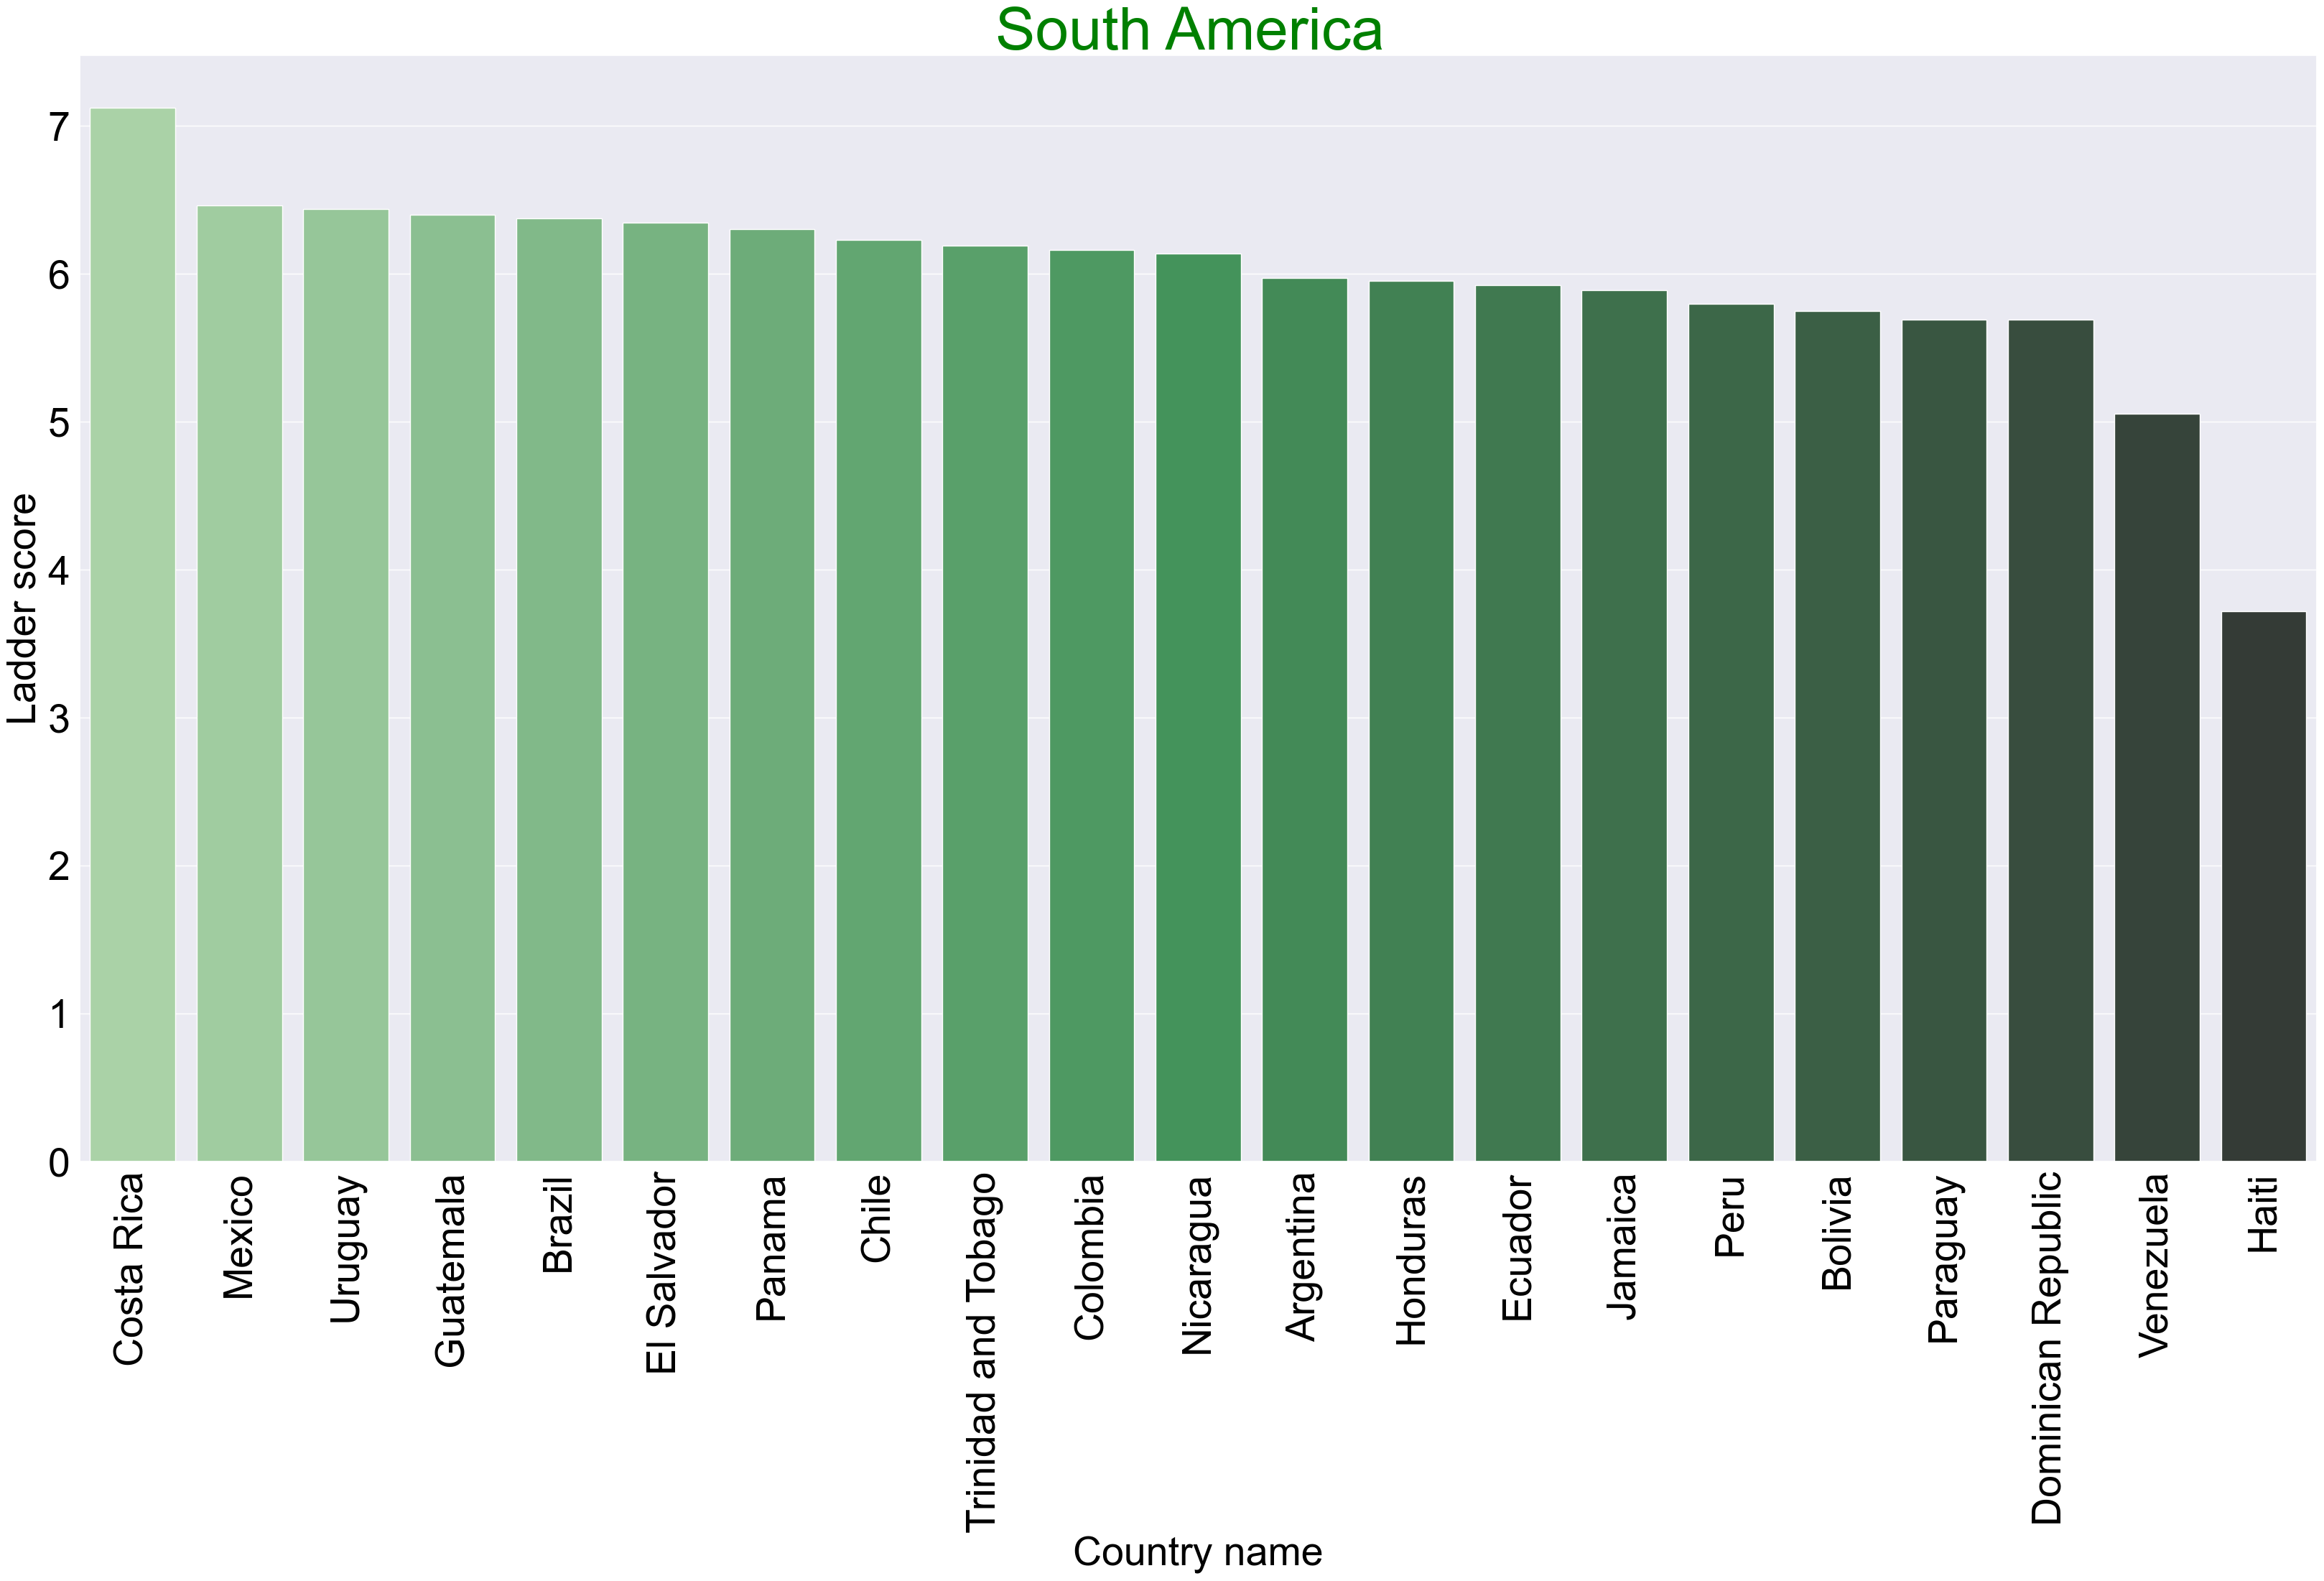

In [18]:
SA_countries = happy[happy['Continent'] == 'South America']
sns.barplot(x = 'Country name', y = 'Ladder score',palette="Greens_d", data = SA_countries)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(40.20, 20)}) 
plt.xticks(size=40, color='black');
plt.yticks(size=40, color='black');
plt.xlabel('Country name', size=40, color='black');
plt.ylabel('Ladder score', size=40, color='black');
plt.title('South America ', size=60, color='Green');

<img src="Costarica.jpg" height="350" width="350">


We then flew to South America and saw the beautiful Costa Rica Coast. We immersed ourselves in a tropical paradise and ziplined through the coast. During our visit, we also traveled to Haiti where the country has been impacted by severe tropical hurricanes and natural disasters. Haiti is the poorest in the western hemisphere which may result in a lower ladder score. South America has a consistent average of 5.98 and is ranked 3rd among the continents.

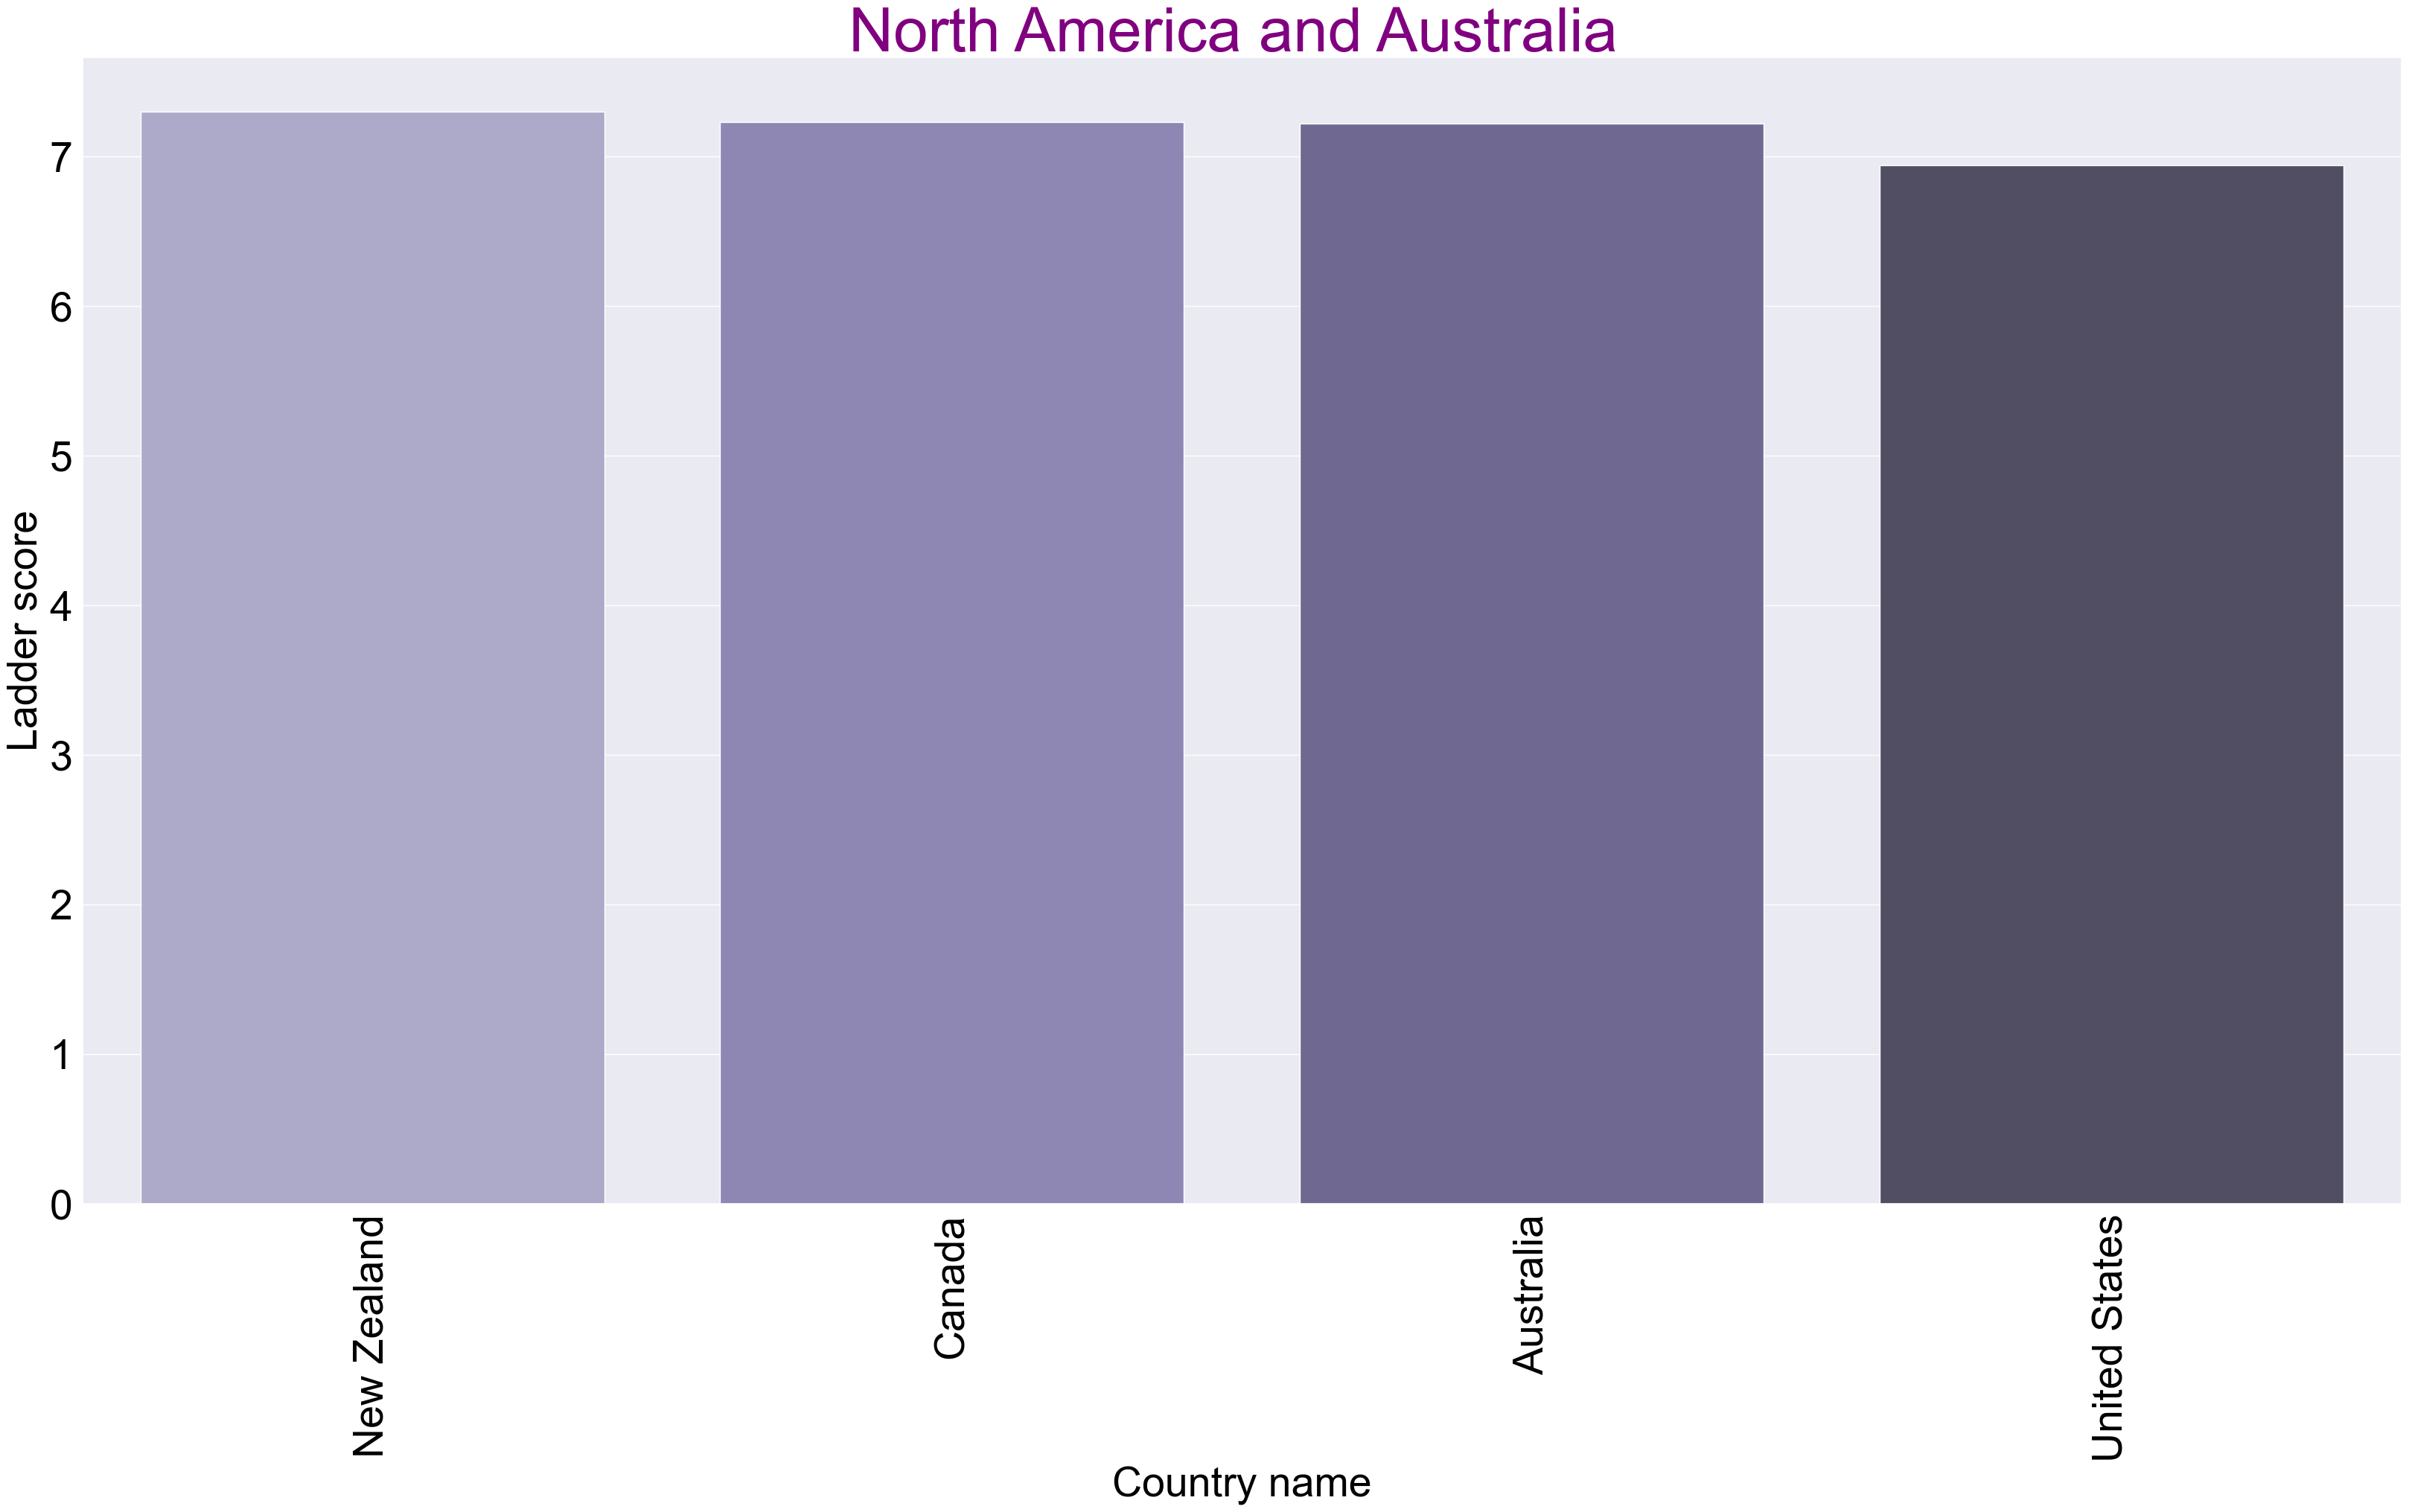

In [19]:
NA_countries = happy[happy['Continent'] == 'North America']
sns.barplot(x = 'Country name', y = 'Ladder score',palette="Purples_d", data = NA_countries)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(40.20, 20)}) 
plt.xticks(size=40, color='black');
plt.yticks(size=40, color='black');
plt.xlabel('Country name', size=40, color='black');
plt.ylabel('Ladder score', size=40, color='black');
plt.title('North America and Australia ', size=60, color='Purple');

<img src="Newzealand.jpg" height="350" width="350">


We then concluded our adventure, returning home. Francis found that the happiest Continent of them all is Australia so he decided to spend time there with the Kangaroos. I headed back to my home in Los Angeles which is the capital of entertainment. Overall both North America and Australia have a high ladder score. We both decided to combine the two continents as there are few countries on each of them. North America has a consistent average of 7.17 is ranked  1st among the continents.

# Factors of Ladder Score

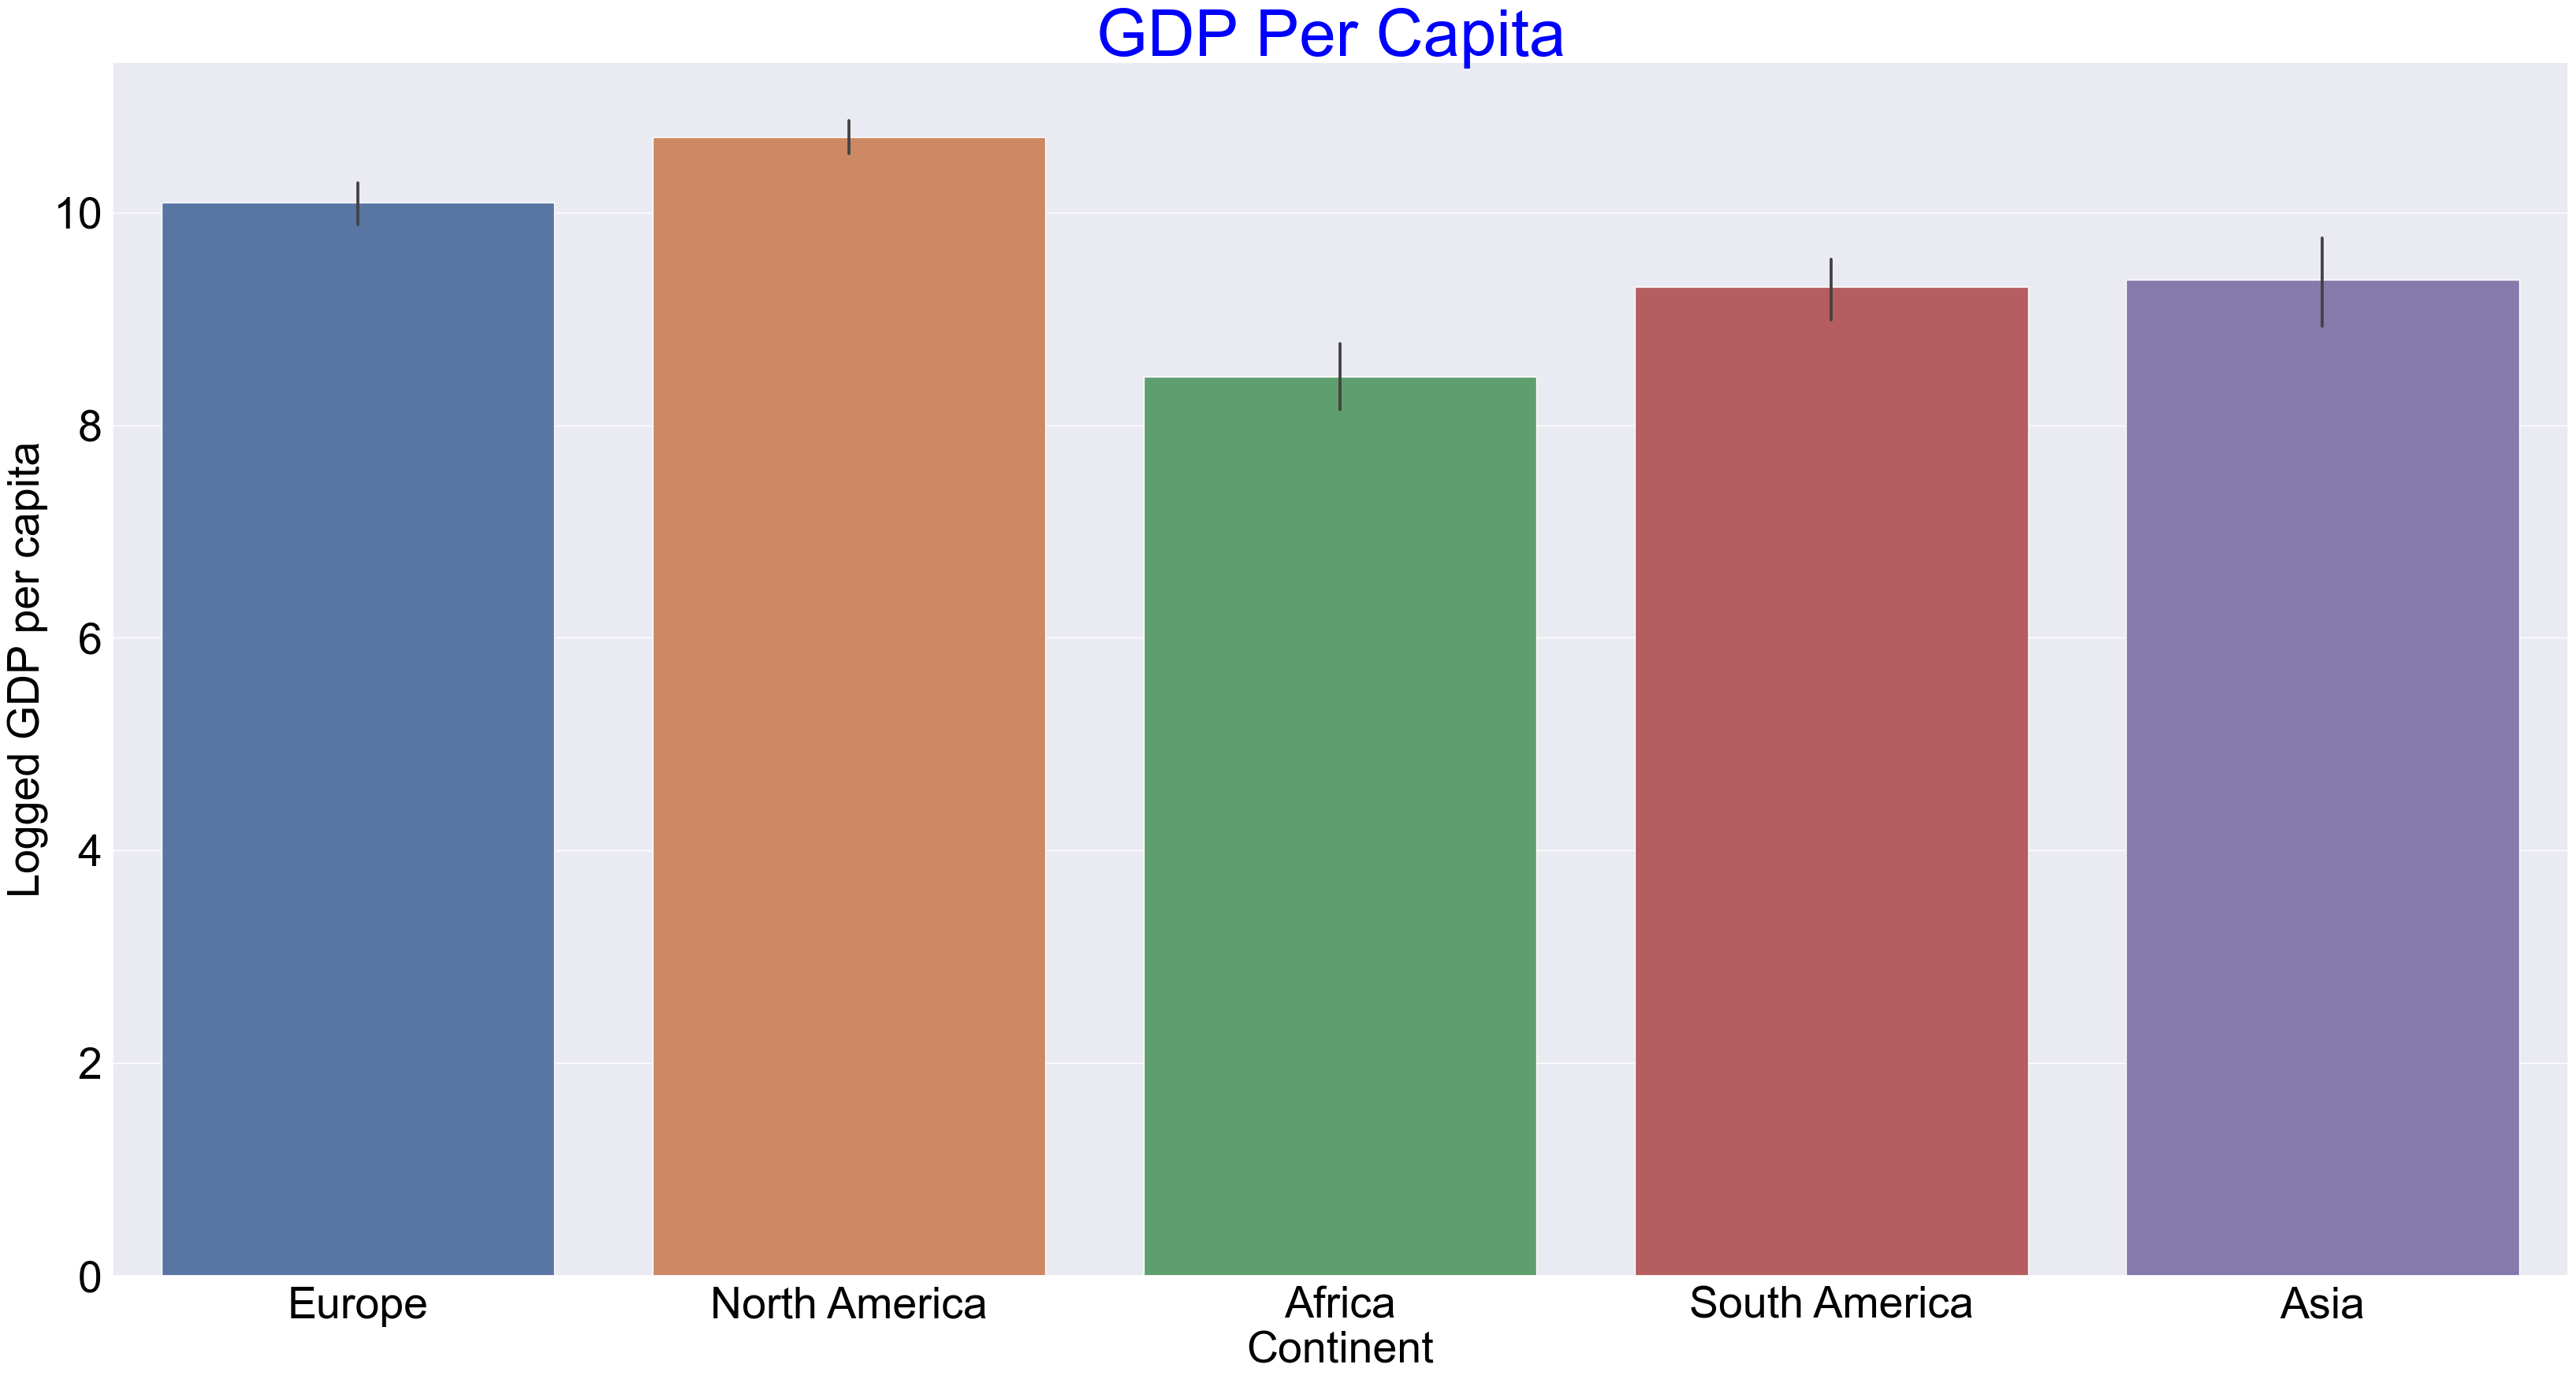

In [20]:
sns.set(rc={'figure.figsize':(40.2, 20)})
sns.barplot(x = 'Continent', y = 'Logged GDP per capita', data = happy)
plt.xlabel('Continent', size=40, color='black');
plt.ylabel('Logged GDP per capita', size=40, color='black');
plt.xticks(size=40, color='black');
plt.yticks(size=40, color='black');
plt.title('GDP Per Capita ', size=60, color='Blue');

We wanted to understand if the GDP affects the happiness of each Continent. Gross Domestic Product (GDP) is the monetary value of all finished goods and services made within a country during a specific period per person. As a result in our analysis, Asia has a higher GDP than South America which means that a higher GDP does not necessarily result in a higher ladder score. Accounts of Freedom and life expectancy are all factors within a ladder score. A bar graph helps indicate this amount of logged GDP per capita because it makes analyzing more efficient. 

In [21]:
import sys
!conda install --yes --prefix {sys.prefix} plotly

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.4.0



## Package Plan ##

  environment location: /Users/francisgonzales/Desktop/anaconda/anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.3.11  |       hca03da5_0         128 KB
    certifi-2024.2.2           |  py310hca03da5_0         161 KB
    plotly-5.19.0              |  py310h33ce5c2_0         6.0 MB
    ------------------------------------------------------------
                                           Total:         6.3 MB

The following packages will be UPDATED:

 

In [22]:
import plotly.graph_objects as go

# The Magic of Plotly
We decided to create heat maps to make the analysis more interactive and easier to see each of the geographical locations. To create interactive experiences, we utilized plotly to create this magic. 

In [23]:
fig = go.Figure(data=go.Choropleth(
    locations=happy['Country name'], # Spatial coordinates
    z = happy['Ladder score'].astype(float), # Data to be color-coded
    locationmode = 'country names', 
    colorscale='plasma', # set of locations match entries in `locations`
    colorbar_title = "Happiness Score",
))

fig.update_layout(
    title='Happiness by Country',
    font=dict(
        size=16,
    )
)
plt.tight_layout()
fig.show()

<Figure size 4020x2000 with 0 Axes>

### Happiness of Each Country 
Using a heat map, we are able to easily indicate each region and see the happiness score of each country. A higher ladder score tier is displayed using yellow and orange colors. While a lower ladder score tier is displayed using dark blue and purple colors.  Users can hover the mouse to see the country and repsective ladder score.

In [24]:
fig = go.Figure(data=go.Choropleth(
    locations=happy['Country name'], # Spatial coordinates
    z = happy['Freedom to make life choices'].astype(float), # Data to be color-coded
    locationmode = 'country names', 
    colorscale='Ice', # set of locations match entries in `locations`
    colorbar_title = "Freedom Score",
))

fig.update_layout(
    title='Freedom by Country',
    font=dict(
        size=16,
    )
)
plt.tight_layout()
fig.show()

<Figure size 4020x2000 with 0 Axes>

### Freedom of each Country 
Using a heat map, we can easily indicate each region and see the freedom score of each country using a blue color. A higher freedom score tier is displayed using lighter shade of blue. While a lower freedom score tier is displayed using darker blue and black colors. Users can hover the mouse to see the country and repsective freedom score.

In [25]:
fig = go.Figure(data=go.Choropleth(
    locations=happy['Country name'], # Spatial coordinates
    z = happy['Healthy life expectancy'].astype(float), # Data to be color-coded
    locationmode = 'country names', 
    colorscale='portland', # set of locations match entries in `locations`
    colorbar_title = "Life Expectancy",
))

fig.update_layout(
    title='Life Expectancy by Country',
    font=dict(
        size=16,
    )
)
plt.tight_layout()
fig.show()

<Figure size 4020x2000 with 0 Axes>

### Life Expectancy of each Country 
Using a heat map, we are able to easily indentify each region's citizen and their life expectancy from each country using a primary color palate. A higher life expectancy tier is displayed using warm colors like Red and Orange. While a lower life expectancy tier is displayed using darker blue and black colors. Users can hover the mouse to see the country and repsective life expectancy age.

# Other magical findings

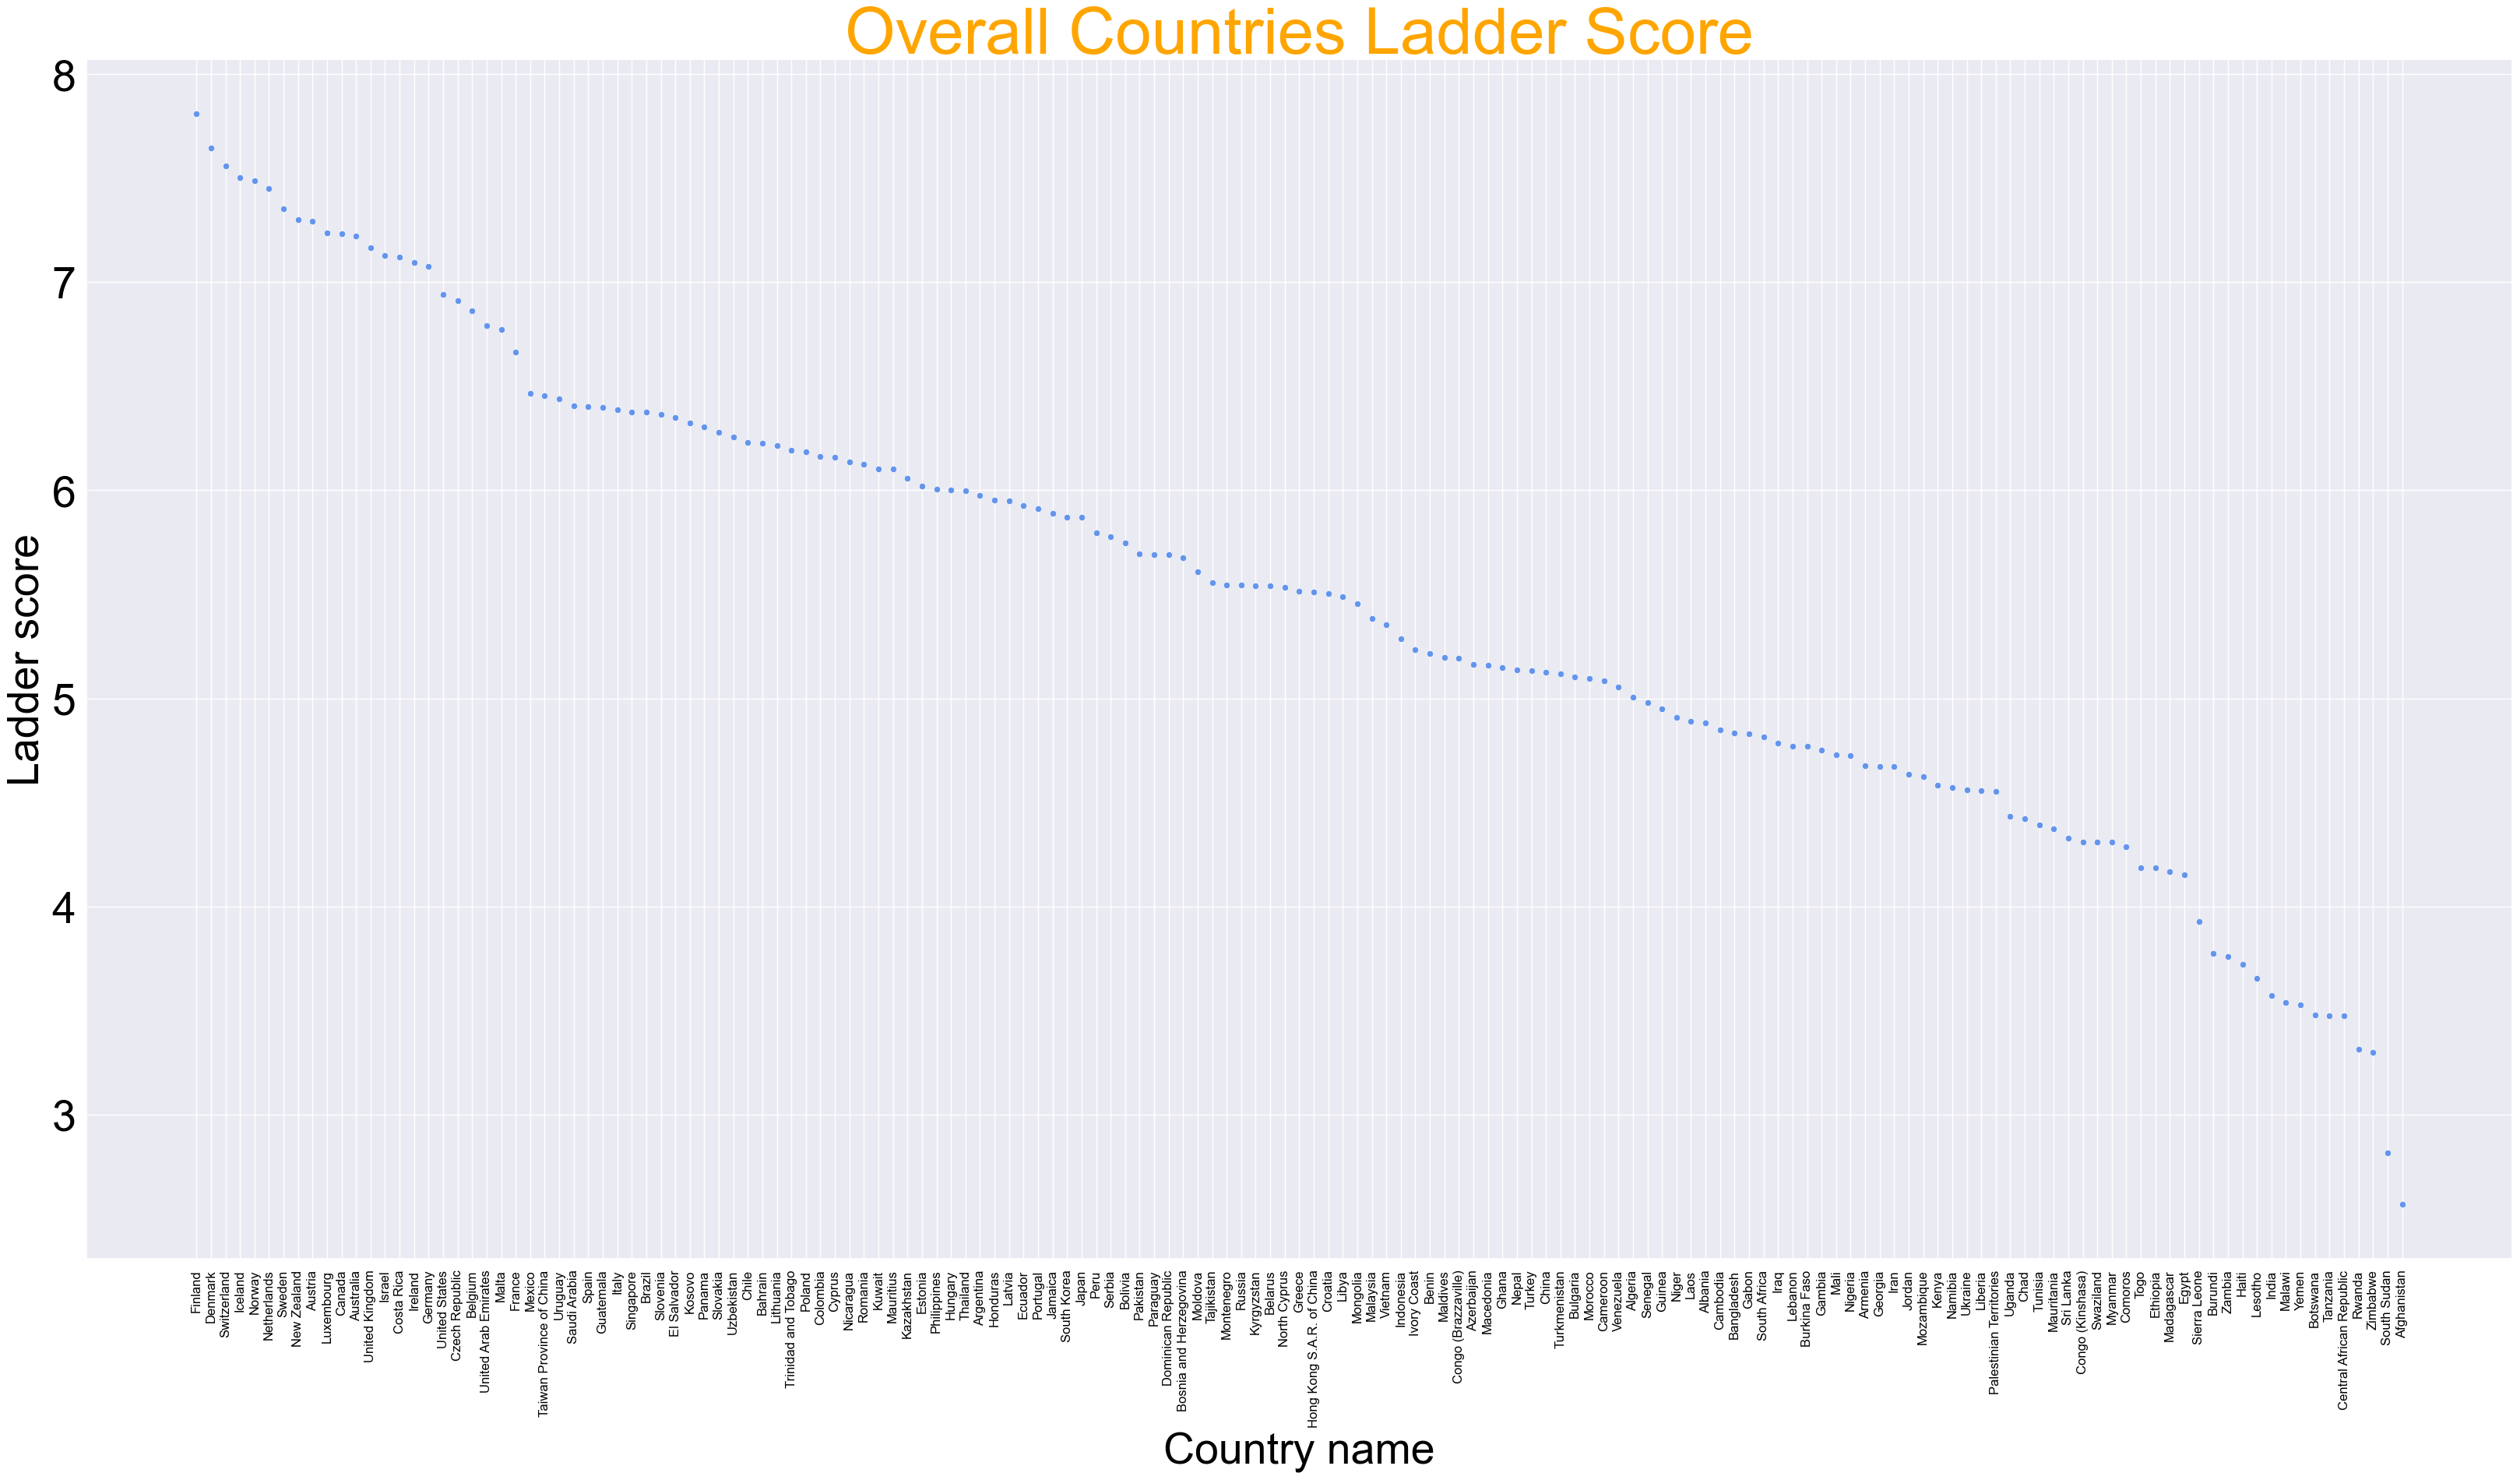

In [26]:
sns.scatterplot(x = 'Country name', y = 'Ladder score', data = happy, color='cornflowerblue')
sns.set(rc={'figure.figsize':(40.20, 20)}) 
plt.xticks(size=12, color='black');
plt.yticks(size=40, color='black');
plt.xticks(rotation=90);
plt.xlabel('Country name', size=40, color='black');
plt.ylabel('Ladder score', size=40, color='black');
plt.title('Overall Countries Ladder Score', size=60, color='Orange');

### The Magic Scatterplots
Using scatterplots, we can easily indentify each country through it's spectrum of ladder scoree happiness. Across plots, we can see there is a linear trend.

/var/folders/0m/k4f8hdf93rj0tkm9c4cfh38r0000gn/T/ipykernel_29226/1323878645.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




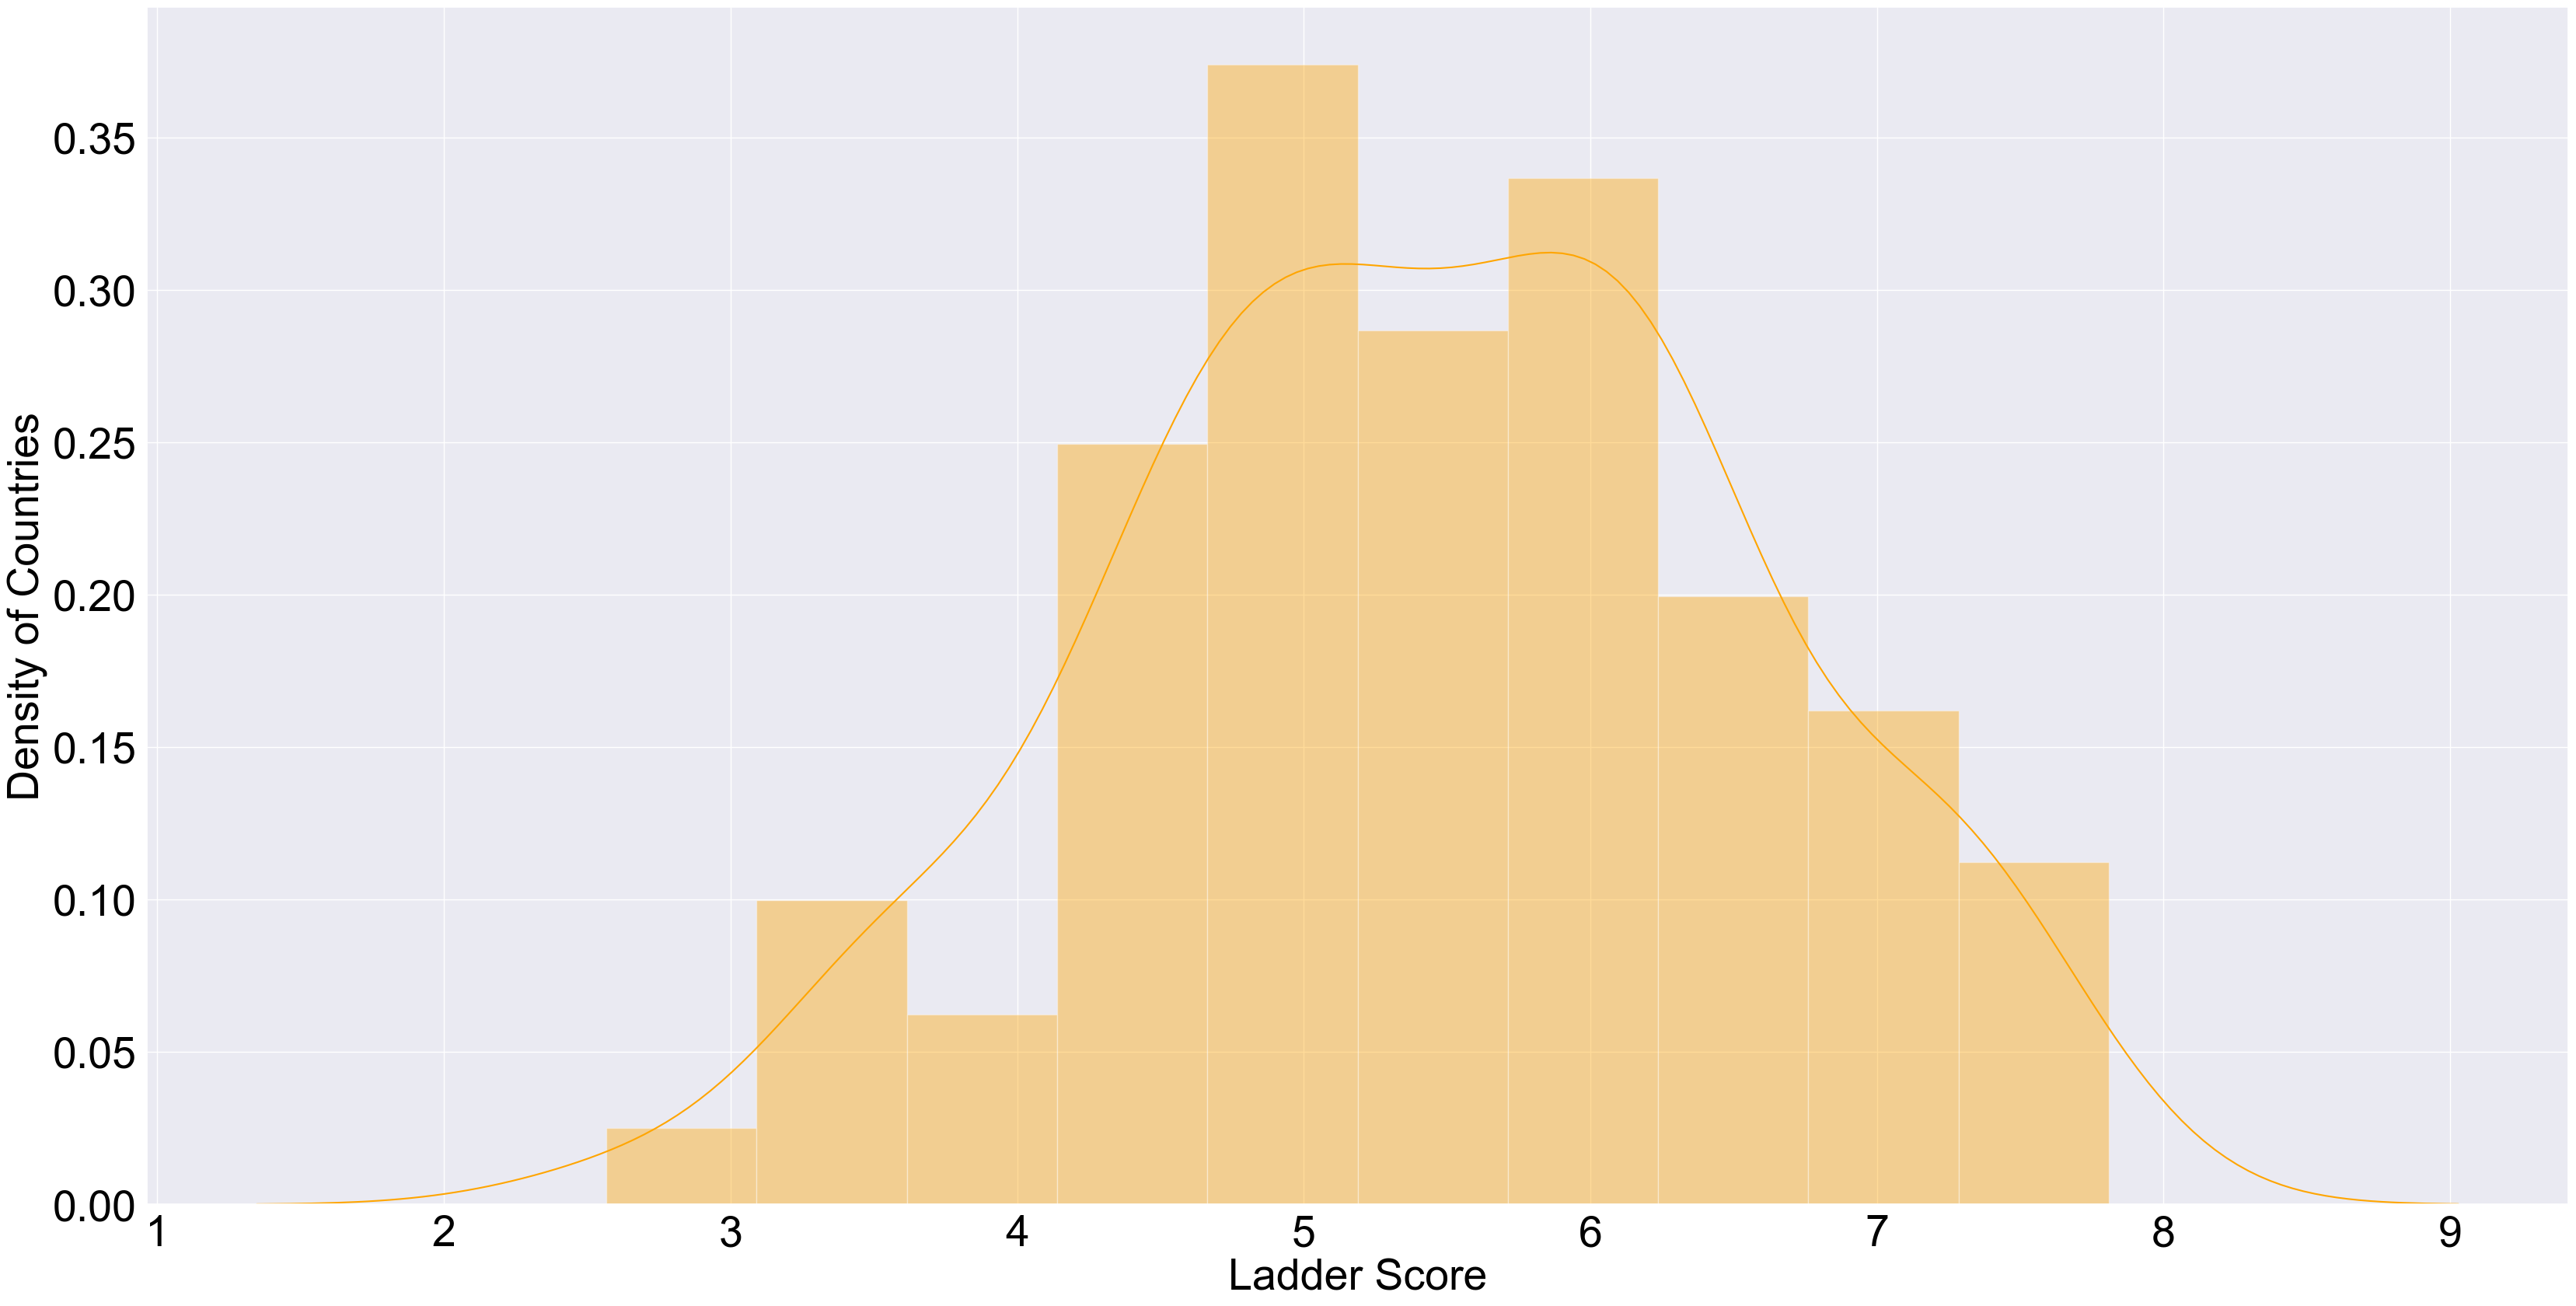

In [27]:
sns.distplot(happy['Ladder score'], color='orange');
plt.xticks(size=40, color='black');
plt.yticks(size=40, color='black');
plt.xlabel('Ladder Score', size=40, color='black');
plt.ylabel('Density of Countries', size=40, color='black');

### The Spread and Distrabution of Happiness
Using a distribution plot, we able to see the density of countries among each ladder score. The densest area is found with a score of 5. This means that we can specify the ladder score distributions and parameters so that we can visualize and compare distributions.


# Plotly's Infinte Magic

In [28]:
fig = px.scatter_3d(happy,
                 x="Generosity",
                 y="Healthy life expectancy",
                 z="Perceptions of corruption",
                 color="Continent",
                hover_name = 'Country name',
                 color_discrete_sequence=px.colors.qualitative.G10,
                      template="plotly_dark")

fig.update_traces(opacity=0.7,
                  )
fig.update_traces(mode='markers',marker_line_color='rgb(255,255,255)', 
                      marker_line_width=2.5)
fig.show()

# Immersive Interactive Scatterplot 
Through the power of Plotly, we can create a 3-dimensional plane field of each distribution and analyze the perceptions of corruption, life expectancy, and Generosity correlation among the countries. Users can interact with the graph by selecting or deselecting each continent's data set. Through creating this plane field we are able to understand the factors that are taken into the happiness index of each countries ladder score.


In [29]:
fig = px.box(happy,
             x="Ladder score",
             y="Continent",
             color="Continent",
             color_discrete_sequence=px.colors.qualitative.Pastel_r,
             hover_name = 'Country name',
             template="plotly_dark")
fig.update_traces(boxmean=True,
                  whiskerwidth=0.8,
                  marker_size=2,
            line_width=2.5
                  )
fig.update_layout(height=600,
                  width=800,
                  showlegend=True,
                  yaxis= dict(showticklabels = False),
                  title="Distribution of happiness score by region")

# Immersive Box and Whisker Plot

Finally, the magic of Plotly doesn't stop there. We utilize a box and whisker plot to understand the statistics and comparing distributions because the center, spread, and overall range are immediately apparent. This is an overall final understanding of the ranges and highlighting any outliers inside the data set. Our box and whisker plot is a way of summarizing our happiness data set measured on this interval scale. 

#  <font size="+3"><center>Happily Ever After </center></font>



 <img src="happily-ever-after-blue-16x9.jpg" height="1000" width="1000">



In the end, we found that there are numerous factors when considering the countries' happiness index. By using the magic of pandas, seaborn, and Plotly, we learned a lot about not only the happiness index but also these crucial python skills. We can take advantage of these programs in bringing happiness to life into this notebook. Thank you to LanLearning! AND LETS GOOOO!!! 